In [1]:
run notebook.py

/Users/alexmillner/miniconda/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%load_ext rpy2.ipython
%matplotlib inline

### Make functions

In [3]:
def num_missing(df):
    miss_pt=si_gpby_narrow_w_na.loc[(si_gpby_narrow_w_na.index.get_level_values(0) < 0 )].sum()

    miss_pt_or_cln=si_gpby_narrow_w_na.loc[(si_gpby_narrow_w_na.index.get_level_values(0) < 0 )|\
                        (si_gpby_narrow_w_na.index.get_level_values(1) < 0 )].sum()

    miss_pt_or_cln_or_fu=si_gpby_narrow_w_na.loc[(si_gpby_narrow_w_na.index.get_level_values(0) < 0 )|\
                        (si_gpby_narrow_w_na.index.get_level_values(1) < 0 )|\
                        (si_gpby_narrow_w_na.index.get_level_values(2) < 0 )].sum()
    
    miss_cln=miss_pt_or_cln-miss_pt
    miss_fu=miss_pt_or_cln_or_fu-miss_pt_or_cln
    
    missingList=[miss_pt,miss_cln,miss_fu,miss_pt_or_cln,miss_pt_or_cln_or_fu]
    idx=['miss_pt','miss_cln','miss_fu','miss_pt_or_cln','miss_pt_or_cln_or_fu']
    
    missing=pd.DataFrame(missingList,index=idx,columns=['missing'])
    
    return(missing)

In [4]:
def make_agreement_table(gpby_df):
    ## Agreement
    #Patient said "I thought about suicide in past week"
    #Clinician agreed
    agree_yes=gpby_df.loc[idx[1,1]].sum()
    
    ## Agreement
    #Patient said "I did NOT think about suicide in past week"
    #Clinician agreed
    agree_no=gpby_df.loc[idx[2,2]].sum()

    #Patient said "I thought about suicide in past week"
    #Clinician disagreed
    pt_yes_disagree=gpby_df.loc[idx[1,2]].sum()
    
    #Clinician said "Pt thought about suicide in past week"
    #Patient disagreed
    cln_yes_disagree=gpby_df.loc[idx[2,1]].sum()

    pt_yes_disagree_pct=np.round((pt_yes_disagree/(agree_yes+pt_yes_disagree))*100,2)
    cln_yes_disagree_pct=np.round((cln_yes_disagree/(agree_yes+cln_yes_disagree))*100,2)
    
    pt_yes_disagree_pct_total=np.round((pt_yes_disagree/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    cln_yes_disagree_pct_total=np.round((cln_yes_disagree/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    disagree_pct_total=np.round(((cln_yes_disagree+pt_yes_disagree)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    agree_pct_total=np.round(((agree_yes+agree_no)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    agree_yes_pct_total=np.round(((agree_yes)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    agree_no_pct_total=np.round(((agree_no)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)

    
    
    
    ####################################################
    ##-------- Agree With Followup
    #Patient said "I thought about suicide in past week"
    #Clinician agreed
    #Had ideation during follow-up
    agree_yes_fu_yes=gpby_df.loc[idx[1,1,1]]

    #Patient said "I thought about suicide in past week"
    #Clinician agreed
    #NO ideation during follow-up
    agree_yes_fu_no=gpby_df.loc[idx[1,1,0]]
    
    #Patient said "I did not think about suicide in past week"
    #Clinician agreed
    #Had ideation during follow-up
    agree_no_fu_yes=gpby_df.loc[idx[2,2,1]]

    #Patient said "I did not think about suicide in past week"
    #Clinician agreed
    #NO ideation during follow-up
    agree_no_fu_no=gpby_df.loc[idx[2,2,0]]

    agree_yes_fu_yes_pct=np.round((agree_yes_fu_yes/(agree_yes_fu_yes+agree_yes_fu_no))*100,2)
    agree_no_fu_yes_pct=np.round((agree_no_fu_yes/(agree_no_fu_yes+agree_no_fu_no))*100,2)
    
    ####################################################
    ##-------- Agree With Followup

    #Patient said "I thought about suicide in past week"
    #Clinician disagreed
    #Had ideation during follow-up
    pt_yes_disagree_fu_yes=gpby_df.loc[idx[1,2,1]]

    #Patient said "I thought about suicide in past week"
    #Clinician disagreed
    #NO ideation during follow-up
    pt_yes_disagree_fu_no=gpby_df.loc[idx[1,2,0]]

    #Clinician said "Pt thought about suicide in past week"
    #Patient disagreed
    #Had ideation during follow-up
    cln_yes_disagree_fu_yes=gpby_df.loc[idx[2,1,1]].sum()

    #Clinician said "Pt thought about suicide in past week"
    #Patient disagreed
    #NO ideation during follow-up
    cln_yes_disagree_fu_no=gpby_df.loc[idx[2,1,0]].sum()
    
    pt_yes_disagree_fu_yes_pct=np.round((pt_yes_disagree_fu_yes/(pt_yes_disagree_fu_yes+pt_yes_disagree_fu_no))*100,2)
    cln_yes_disagree_fu_yes_pct=np.round((cln_yes_disagree_fu_yes/(cln_yes_disagree_fu_yes+cln_yes_disagree_fu_no))*100,2)

    
    agree_disagree_table=pd.DataFrame(\
    [pt_yes_disagree_pct,cln_yes_disagree_pct,\
     pt_yes_disagree_pct_total,cln_yes_disagree_pct_total,disagree_pct_total,agree_pct_total,\
     agree_yes_pct_total,agree_no_pct_total,agree_yes,pt_yes_disagree,cln_yes_disagree,agree_no,\
    agree_yes_fu_yes_pct,agree_no_fu_yes_pct,agree_yes_fu_yes,agree_yes_fu_no,agree_no_fu_yes,agree_no_fu_no,\
    pt_yes_disagree_fu_yes_pct,cln_yes_disagree_fu_yes_pct,pt_yes_disagree_fu_yes,pt_yes_disagree_fu_no,cln_yes_disagree_fu_yes,cln_yes_disagree_fu_no],\
    index=\
    ['pt_yes_disagree_pct','cln_yes_disagree_pct','pt_yes_disagree_pct_total','cln_yes_disagree_pct_total',\
     'disagree_pct_total','agree_pct_total','agree_yes_pct_total','agree_no_pct_total',\
     'agree_yes','pt_yes_disagree','cln_yes_disagree','agree_no',\
    'agree_yes_fu_yes_pct','agree_no_fu_yes_pct','agree_yes_fu_yes','agree_yes_fu_no','agree_no_fu_yes','agree_no_fu_no',\
    'pt_yes_disagree_fu_yes_pct','cln_yes_disagree_fu_yes_pct','pt_yes_disagree_fu_yes','pt_yes_disagree_fu_no','cln_yes_disagree_fu_yes','cln_yes_disagree_fu_no']\
                                    )
    return(agree_disagree_table)

In [5]:
def make_agreement_table(gpby_df):
    ## Agreement
    #Patient said "I thought about suicide in past week"
    #Clinician agreed
    agree_yes=gpby_df.loc[idx[1,1]].sum()
    
    ## Agreement
    #Patient said "I did NOT think about suicide in past week"
    #Clinician agreed
    agree_no=gpby_df.loc[idx[2,2]].sum()

    #Patient said "I thought about suicide in past week"
    #Clinician disagreed
    pt_yes_disagree=gpby_df.loc[idx[1,2]].sum()
    
    #Clinician said "Pt thought about suicide in past week"
    #Patient disagreed
    cln_yes_disagree=gpby_df.loc[idx[2,1]].sum()

    pt_yes_disagree_pct=np.round((pt_yes_disagree/(agree_yes+pt_yes_disagree))*100,2)
    cln_yes_disagree_pct=np.round((cln_yes_disagree/(agree_yes+cln_yes_disagree))*100,2)
    
    pt_yes_disagree_pct_total=np.round((pt_yes_disagree/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    cln_yes_disagree_pct_total=np.round((cln_yes_disagree/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    disagree_pct_total=np.round(((cln_yes_disagree+pt_yes_disagree)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    agree_pct_total=np.round(((agree_yes+agree_no)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    agree_yes_pct_total=np.round(((agree_yes)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)
    agree_no_pct_total=np.round(((agree_no)/(agree_yes+pt_yes_disagree+agree_no+cln_yes_disagree))*100,2)

    
    
    
    ####################################################
    ##-------- Agree With Followup
    #Patient said "I thought about suicide in past week"
    #Clinician agreed
    #Had ideation during follow-up
    agree_yes_fu_yes=gpby_df.loc[idx[1,1,1]]

    #Patient said "I thought about suicide in past week"
    #Clinician agreed
    #NO ideation during follow-up
    agree_yes_fu_no=gpby_df.loc[idx[1,1,0]]
    
    #Patient said "I did not think about suicide in past week"
    #Clinician agreed
    #Had ideation during follow-up
    agree_no_fu_yes=gpby_df.loc[idx[2,2,1]]

    #Patient said "I did not think about suicide in past week"
    #Clinician agreed
    #NO ideation during follow-up
    agree_no_fu_no=gpby_df.loc[idx[2,2,0]]

    agree_yes_fu_yes_pct=np.round((agree_yes_fu_yes/(agree_yes_fu_yes+agree_no_fu_yes))*100,2)
    agree_no_fu_yes_pct=np.round((agree_no_fu_yes/(agree_no_fu_yes+agree_yes_fu_yes))*100,2)
    
    ####################################################
    ##-------- Agree With Followup

    #Patient said "I thought about suicide in past week"
    #Clinician disagreed
    #Had ideation during follow-up
    pt_yes_disagree_fu_yes=gpby_df.loc[idx[1,2,1]]

    #Patient said "I thought about suicide in past week"
    #Clinician disagreed
    #NO ideation during follow-up
    pt_yes_disagree_fu_no=gpby_df.loc[idx[1,2,0]]

    #Clinician said "Pt thought about suicide in past week"
    #Patient disagreed
    #Had ideation during follow-up
    cln_yes_disagree_fu_yes=gpby_df.loc[idx[2,1,1]].sum()

    #Clinician said "Pt thought about suicide in past week"
    #Patient disagreed
    #NO ideation during follow-up
    cln_yes_disagree_fu_no=gpby_df.loc[idx[2,1,0]].sum()
    
    pt_yes_disagree_fu_yes_pct=np.round((pt_yes_disagree_fu_yes/(pt_yes_disagree_fu_yes+cln_yes_disagree_fu_yes))*100,2)
    cln_yes_disagree_fu_yes_pct=np.round((cln_yes_disagree_fu_yes/(cln_yes_disagree_fu_yes+pt_yes_disagree_fu_yes))*100,2)

    
    agree_disagree_table=pd.DataFrame(\
    [pt_yes_disagree_pct,cln_yes_disagree_pct,\
     pt_yes_disagree_pct_total,cln_yes_disagree_pct_total,disagree_pct_total,agree_pct_total,\
     agree_yes_pct_total,agree_no_pct_total,agree_yes,pt_yes_disagree,cln_yes_disagree,agree_no,\
    agree_yes_fu_yes_pct,agree_no_fu_yes_pct,agree_yes_fu_yes,agree_yes_fu_no,agree_no_fu_yes,agree_no_fu_no,\
    pt_yes_disagree_fu_yes_pct,cln_yes_disagree_fu_yes_pct,pt_yes_disagree_fu_yes,pt_yes_disagree_fu_no,cln_yes_disagree_fu_yes,cln_yes_disagree_fu_no],\
    index=\
    ['pt_yes_disagree_pct','cln_yes_disagree_pct','pt_yes_disagree_pct_total','cln_yes_disagree_pct_total',\
     'disagree_pct_total','agree_pct_total','agree_yes_pct_total','agree_no_pct_total',\
     'agree_yes','pt_yes_disagree','cln_yes_disagree','agree_no',\
    'agree_yes_fu_yes_pct','agree_no_fu_yes_pct','agree_yes_fu_yes','agree_yes_fu_no','agree_no_fu_yes','agree_no_fu_no',\
    'pt_yes_disagree_fu_yes_pct','cln_yes_disagree_fu_yes_pct','pt_yes_disagree_fu_yes','pt_yes_disagree_fu_no','cln_yes_disagree_fu_yes','cln_yes_disagree_fu_no']\
                                    )
    return(agree_disagree_table)

In [6]:
def senspec(TN,TP,FP,FN):
    sensspec=pd.DataFrame(index=['sens','spec','ppv','npv'],columns=TP.index)

    sensspec.loc['sens']=TP/(TP+FN)
    sensspec.loc['spec']=TN/(TN+FP)
    sensspec.loc['ppv']=TP/(TP+FP)
    sensspec.loc['npv']=TN/(TN+FN)
    return(sensspec)

## Import data

In [7]:
fullpth='/Users/alexmillner/Harvard University/NockLab - ResearchProjects/2014_AFSP_MGH_APS/09_DATA MANAGEMENT/data/'
datapth = fullpth
os.chdir(fullpth)
print(fullpth)

os.chdir(datapth+'final_db/fixed_SP_SA_data/')
db=pd.read_csv('MGH_AFSP_db_SP_SA_fixed.csv',index_col=0)
db['subn']=db['subn.1']

os.chdir(datapth+'final_db/')
db_ehr=pd.read_csv('Nock_AFSPstudy_EHRoutcomes.csv',index_col=0)
db_ehr=db_ehr.rename(columns={'bl_id':'subn'})

/Users/alexmillner/Harvard University/NockLab - ResearchProjects/2014_AFSP_MGH_APS/09_DATA MANAGEMENT/data/


## Check EHR data and merge with db

#### EHR broad and narrow are identical 

In [8]:
db_ehr[db_ehr.SA_Fstrict_6m!=db_ehr.SA_Fbroad_6m]

,subn,bl_date,ED_1m,ED_6m,Inpt_1m,Inpt_6m,SA_Fstrict_1m,SA_Fstrict_6m,SA_Fbroad_1m,SA_Fbroad_6m,SI_1m,SI_6m,Injury_1m,Injury_6m
enroll_id,,,,,,,,,,,,,,


In [9]:
db_ehr[db_ehr.SA_Fstrict_1m!=db_ehr.SA_Fbroad_1m]

,subn,bl_date,ED_1m,ED_6m,Inpt_1m,Inpt_6m,SA_Fstrict_1m,SA_Fstrict_6m,SA_Fbroad_1m,SA_Fbroad_6m,SI_1m,SI_6m,Injury_1m,Injury_6m
enroll_id,,,,,,,,,,,,,,


In [10]:
db_ehr=db_ehr.drop(['SA_Fbroad_1m','SA_Fbroad_6m'],axis=1)

### Any duplicate participant numbers?

In [11]:
db_ehr[db_ehr.subn.duplicated()]

,subn,bl_date,ED_1m,ED_6m,Inpt_1m,Inpt_6m,SA_Fstrict_1m,SA_Fstrict_6m,SI_1m,SI_6m,Injury_1m,Injury_6m
enroll_id,,,,,,,,,,,,


In [12]:
db[db.subn.duplicated()]

,subn.1,bl_demo_age,bl_demo_gndr,bl_demo_hisp_desc,bl_demo_hisp_not,bl_demo_hisp_mexican,bl_demo_hisp_puerto,bl_demo_hisp_cuban,bl_demo_hisp_othr,bl_demo_race_desc,...,f6_slfhrm_gesture_whhap,f6_slfhrm_abort,f6_slfhrm_abort_whhap,f6_slfhrm_interrupt,f6_slfhrm_interrupt_whhap,f6_slfhrm_nssi,f6_slfhrm_nssi_nt,f6_slfhrm_vchk,subn.1.1,subn
subn,,,,,,,,,,,,,,,,,,,,,


#### Prepare EHR to merge with db

In [13]:
db_ehr=db_ehr.add_suffix('_ehr')

In [14]:
db_ehr=db_ehr.rename(columns={'subn_ehr':'subn'})

In [15]:
db.index.name='subn_idx'

In [16]:
db=db.merge(db_ehr,on='subn')

### Prepare db

In [17]:
#Some people had like seconds for time stamps
db.loc[~(db.bl_datetime_total_time.str.contains(':')==True),'bl_datetime_total_time']=np.nan


In [18]:
db.bl_datetime_total_time=pd.to_datetime(db.bl_datetime_total_time,format = '%H:%M:%S')

In [19]:
#median
dates = list(db.sort_values('bl_datetime_total_time')['bl_datetime_total_time'].dropna())
print(dates[len(dates)//2])

1900-01-01 00:22:17


In [20]:
#Max duration = 1 hr
max_len=pd.to_datetime(pd.DataFrame(['01:00:00'])[0],format = '%H:%M:%S')[0]

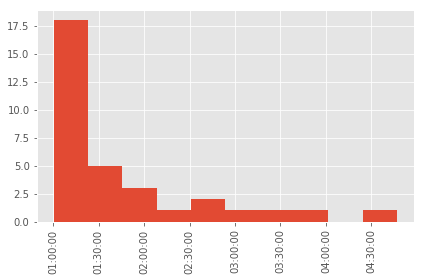

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

fig, ax = plt.subplots()
db[db.bl_datetime_total_time>max_len].bl_datetime_total_time.hist(ax=ax,xrot=90)
days     = mpl.dates.HourLocator()
#ax.xaxis.set_major_locator(days)
majorFormatter = mpl.dates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(majorFormatter)
ax.autoscale_view()
fig.tight_layout()
plt.savefig('MGH_baseline_totaltime.pdf')

### Determine groups for BASELINE past week SI and SA

In [22]:
### Add past week SI and past week SA

db['si_pst_wk']=2
db.loc[(db['bl_slfhrm_si']==1)&(db['bl_slfhrm_si_mostrec']==1),'si_pst_wk']=1
db.loc[(db['bl_slfhrm_si'].isnull()),'si_pst_wk']=np.nan

db['si_pst_wk_nona']=db['si_pst_wk']
db.loc[(db['bl_slfhrm_si']==1)&(db['bl_slfhrm_si_mostrec'].isnull()),'si_pst_wk_nona']=np.nan

db['sa_pst_wk']=2
db.loc[(db['bl_slfhrm_sa']==1)&(db['bl_slfhrm_sa_mostrec']==1),'sa_pst_wk']=1
db.loc[(db['bl_slfhrm_sa'].isnull()),'sa_pst_wk']=np.nan

db['sa_pst_wk_nona']=db['sa_pst_wk']
db.loc[(db['bl_slfhrm_sa']==1)&(db['bl_slfhrm_sa_mostrec'].isnull()),'sa_pst_wk_nona']=np.nan

### Determine groups for narrow and broad SI and SA for FOLLOW-UP

In [23]:
### Add SI Narrow

#### Set all as NaN
for col in ['f1_slfhrm_si_narrow','f1_slfhrm_si_broad','f6_slfhrm_si_narrow','f6_slfhrm_si_broad',\
   'f1_f6_slfhrm_si_narrow','f1_f6_slfhrm_si_broad']:
    db[col]=np.nan

#### If sub has ANY non-NaN entry, set to zero
db.loc[(db[db.filter(like='f1_').columns].notnull()).any(axis=1)\
       ,['f1_slfhrm_si_broad','f1_slfhrm_si_narrow']]=0

db.loc[(db[db.filter(like='f6_').columns].notnull()).any(axis=1)\
       ,['f6_slfhrm_si_broad','f6_slfhrm_si_narrow']]=0

db.loc[(db['f1_slfhrm_si_narrow'].notnull())|(db['f6_slfhrm_si_narrow'].notnull()),'f1_f6_slfhrm_si_narrow']=0

db.loc[(db['f1_slfhrm_si_broad'].notnull())|(db['f6_slfhrm_si_broad'].notnull()),'f1_f6_slfhrm_si_broad']=0

#Add 1's for narrow def SA for 1-month and 6-month follow-up
db.loc[(db.f1_trmt_er_rsn_si==1)|(db.f1_trmt_ovrnght_hosp_rsn_si==1)|(db.f1_slfhrm_si==1)\
       |(db.f1_trmt_er_si_nt>0)|(db.f1_trmt_ovrnght_hosp_si_nt>0)\
       ,'f1_slfhrm_si_narrow']=1

db.loc[(db.f6_trmt_er_rsn_si==1)|(db.f6_trmt_ovrnght_hosp_rsn_si==1)|(db.f6_slfhrm_si==1)\
       |(db.f6_trmt_er_si_nt>0)|(db.f6_trmt_ovrnght_hosp_si_nt>0)\
       ,'f6_slfhrm_si_narrow']=1.0

db.loc[(db['f1_slfhrm_si_narrow']==1)|(db['f6_slfhrm_si_narrow']==1),'f1_f6_slfhrm_si_narrow']=1

In [24]:
### Add SA Narrow and Broad

#### Set all as NaN
for col in ['f1_slfhrm_sa_narrow','f1_slfhrm_sa_broad','f6_slfhrm_sa_narrow','f6_slfhrm_sa_broad',\
   'f1_f6_slfhrm_sa_narrow','f1_f6_slfhrm_sa_broad']:
    db[col]=np.nan

#### If sub has ANY non-NaN entry, set to zero
db.loc[(db[db.filter(like='f1_').columns].notnull()).any(axis=1)\
       ,['f1_slfhrm_sa_broad','f1_slfhrm_sa_narrow']]=0

db.loc[(db[db.filter(like='f6_').columns].notnull()).any(axis=1)\
       ,['f6_slfhrm_sa_broad','f6_slfhrm_sa_narrow']]=0

db.loc[(db['f1_slfhrm_sa_narrow'].notnull())|(db['f6_slfhrm_sa_narrow'].notnull()),'f1_f6_slfhrm_sa_narrow']=0

db.loc[(db['f1_slfhrm_sa_broad'].notnull())|(db['f6_slfhrm_sa_broad'].notnull()),'f1_f6_slfhrm_sa_broad']=0

#Add 1's for narrow def SA for 1-month and 6-month follow-up
db.loc[(db.f1_trmt_er_rsn_sa==1)|(db.f1_trmt_ovrnght_hosp_rsn_sa==1)|(db.f1_slfhrm_sa==1)\
       |(db.f1_trmt_er_sa_nt>0)|(db.f1_trmt_ovrnght_hosp_sa_nt>0)\
       ,'f1_slfhrm_sa_narrow']=1

db.loc[(db.f6_trmt_er_rsn_sa==1)|(db.f6_trmt_ovrnght_hosp_rsn_sa==1)|(db.f6_slfhrm_sa==1)\
       |(db.f6_trmt_er_sa_nt>0)|(db.f6_trmt_ovrnght_hosp_sa_nt>0)\
       ,'f6_slfhrm_sa_narrow']=1.0

db.loc[(db['f1_slfhrm_sa_narrow']==1)|(db['f6_slfhrm_sa_narrow']==1),'f1_f6_slfhrm_sa_narrow']=1

#Add 1's for broad def SA for 1-month and 6-month follow-up

db.loc[(db.f1_trmt_er_rsn_sa==1)|(db.f1_trmt_ovrnght_hosp_rsn_sa==1)|(db.f1_slfhrm_sa==1)\
       |(db.f1_trmt_er_sa_nt>0)|(db.f1_trmt_ovrnght_hosp_sa_nt>0)\
       |(db.f1_trmt_er_rsn_si==1)|(db.f1_trmt_er_si_nt>0)|(db.f1_trmt_ovrnght_hosp_rsn_si==1)\
       |(db.f1_trmt_ovrnght_hosp_si_nt>0) | (db.f1_slfhrm_interrupt==1) | (db.f1_slfhrm_abort==1)
       ,'f1_slfhrm_sa_broad']=1.0

db.loc[(db.f6_trmt_er_rsn_sa==1)|(db.f6_trmt_ovrnght_hosp_rsn_sa==1)|(db.f6_slfhrm_sa==1)\
       |(db.f6_trmt_er_sa_nt>0)|(db.f6_trmt_ovrnght_hosp_sa_nt>0)\
       |(db.f6_trmt_er_rsn_si==1)|(db.f6_trmt_er_si_nt>0)|(db.f6_trmt_ovrnght_hosp_rsn_si==1)\
       |(db.f6_trmt_ovrnght_hosp_si_nt>0) | (db.f6_slfhrm_interrupt==1) | (db.f6_slfhrm_abort==1)
       ,'f6_slfhrm_sa_broad']=1.0

In [25]:
si_gpby_narrow=db.groupby(['si_pst_wk_nona','cln_si','f1_f6_slfhrm_si_narrow']).subn.count()
si_gpby_narrow_w_na=db.fillna(-999).groupby(['si_pst_wk_nona','cln_si','f1_f6_slfhrm_si_narrow']).subn.count()

si_fusa_gpby_narrow=db.groupby(['si_pst_wk_nona','cln_si','f1_f6_slfhrm_sa_narrow']).subn.count()
si_fusa_gpby_narrow_w_na=db.fillna(-999).groupby(['si_pst_wk_nona','cln_si','f1_f6_slfhrm_sa_narrow']).subn.count()

sa_gpby_narrow=db.groupby(['sa_pst_wk_nona','cln_sa','f1_f6_slfhrm_sa_narrow']).subn.count()
sa_gpby_narrow_w_na=db.fillna(-999).groupby(['sa_pst_wk_nona','cln_sa','f1_f6_slfhrm_sa_narrow']).subn.count()

sa_gpby_broad=db.groupby(['sa_pst_wk_nona','cln_sa','f1_f6_slfhrm_sa_broad']).f1_f6_slfhrm_sa_broad.count()
sa_gpby_broad_w_na=db.fillna(-999).groupby(['sa_pst_wk_nona','cln_sa','f1_f6_slfhrm_sa_broad']).f1_f6_slfhrm_sa_broad.count()

### Determine agreement/disagreement

In [26]:
pt_sa_yes_cln_si_no=db[(db['sa_pst_wk_nona']==1)&(db['cln_si']==2)&(db['sa_pst_wk_nona'].notnull())&(db['cln_si'].notnull())].shape[0]
pt_sa_yes_cln_si_yes=db[(db['sa_pst_wk_nona']==1)&(db['cln_si']==1)&(db['sa_pst_wk_nona'].notnull())&(db['cln_si'].notnull())].shape[0]
cln_sa_yes_pt_si_no=db[(db['si_pst_wk_nona']==2)&(db['cln_sa']==1)&(db['si_pst_wk_nona'].notnull())&(db['cln_sa'].notnull())].shape[0]
cln_sa_yes_pt_si_yes=db[(db['si_pst_wk_nona']==1)&(db['cln_sa']==1)&(db['si_pst_wk_nona'].notnull())&(db['cln_sa'].notnull())].shape[0]


In [27]:
si_missing=num_missing(si_gpby_narrow_w_na)
si_fusa_missing=num_missing(si_fusa_gpby_narrow_w_na)
sa_missing_narrow=num_missing(sa_gpby_narrow_w_na)

si_tble=make_agreement_table(si_gpby_narrow_w_na)
si_fusa_tble=make_agreement_table(si_fusa_gpby_narrow_w_na)
sa_tble=make_agreement_table(sa_gpby_narrow_w_na)

In [28]:
def mk_tables(df):
    si_gpby_narrow_w_na=df.fillna(-999).groupby(['si_pst_wk_nona','cln_si','f1_f6_slfhrm_si_narrow']).subn.count()
    si_fusa_gpby_narrow_w_na=df.fillna(-999).groupby(['si_pst_wk_nona','cln_si','f1_f6_slfhrm_sa_narrow']).subn.count()
    sa_gpby_narrow_w_na=df.fillna(-999).groupby(['sa_pst_wk_nona','cln_sa','f1_f6_slfhrm_sa_narrow']).subn.count()

    si_tble=make_agreement_table(si_gpby_narrow_w_na)
    si_fusa_tble=make_agreement_table(si_fusa_gpby_narrow_w_na)
    sa_tble=make_agreement_table(sa_gpby_narrow_w_na)

    tables=pd.concat([si_tble,si_fusa_tble,sa_tble],axis=1)
    tables.columns=['si','si_fu_sa','sa']
    return(tables)

In [29]:
missing=pd.concat([si_missing,si_fusa_missing,sa_missing_narrow],axis=1)
missing.columns=['si','si_fu_sa','sa']
tables=pd.concat([si_tble,si_fusa_tble,sa_tble],axis=1)
tables.columns=['si','si_fu_sa','sa']

In [30]:
missing

,si,si_fu_sa,sa
miss_pt,322,322,322
miss_cln,17,17,17
miss_fu,293,293,293
miss_pt_or_cln,339,339,339
miss_pt_or_cln_or_fu,632,632,632


In [31]:
print('pt attempt, cln no ideation: {} out of 112'.format(pt_sa_yes_cln_si_no))
print('pt attempt, cln yes ideation: {}'.format(pt_sa_yes_cln_si_yes))
print('cln attempt, pt no ideation: {} out of 62'.format(cln_sa_yes_pt_si_no))
print('cln attempt, pt yes ideation: {}'.format(cln_sa_yes_pt_si_yes))

pt attempt, cln no ideation: 12 out of 112
pt attempt, cln yes ideation: 211
cln attempt, pt no ideation: 36 out of 62
cln attempt, pt yes ideation: 155


In [32]:
tables

,si,si_fu_sa,sa
pt_yes_disagree_pct,9.41,9.41,49.78
cln_yes_disagree_pct,25.51,25.51,40.74
pt_yes_disagree_pct_total,5.93,5.93,7.48
cln_yes_disagree_pct_total,19.53,19.53,5.19
disagree_pct_total,25.45,25.45,12.67
agree_pct_total,74.55,74.55,87.33
agree_yes_pct_total,57.04,57.04,7.55
agree_no_pct_total,17.51,17.51,79.78
agree_yes,847.00,847.00,112.00
pt_yes_disagree,88.00,88.00,111.00


In [33]:
pal = sns.color_palette("RdBu_r", n_colors=5, desat=.65)
pal.as_hex()


['#4e80a4', '#b2ccd9', '#f7f6f6', '#e7bda9', '#b15c59']

In [34]:
os.chdir('/Users/alexmillner/Google Drive/Work/Projects/CurrentProjects/MGH_AFSP_agreement/figs')

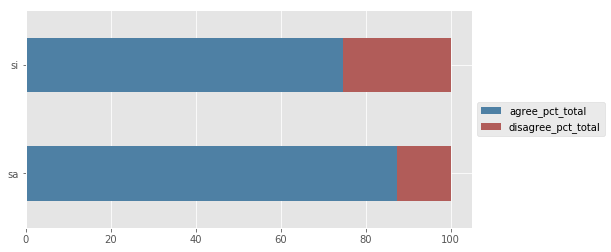

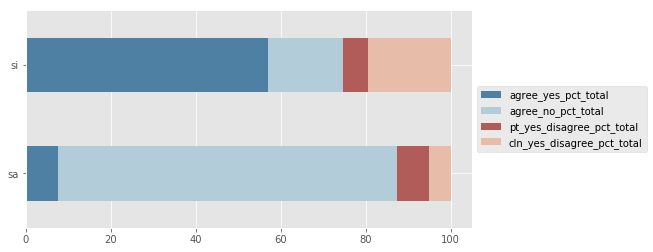

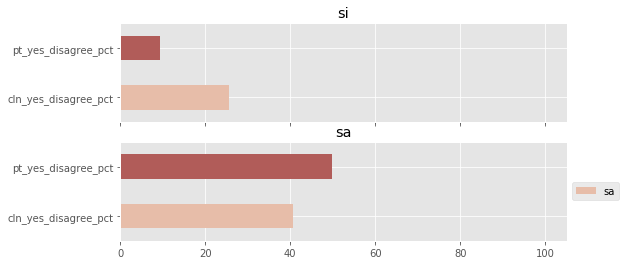

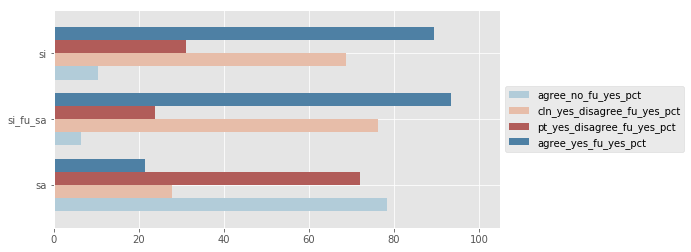

In [35]:
from matplotlib.colors import ListedColormap
palt=sns.color_palette("RdBu_r", n_colors=5, desat=.65)
#palt.reverse()
cmap = ListedColormap(palt)


tables.loc[['agree_pct_total','disagree_pct_total'],['sa','si',]].T.plot(kind='barh',figsize=(8, 4),stacked=True,cmap=cmap)
plt.xlim([0,105])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('pt_cln_1agree_disagree_overall.pdf',bbox_inches = 'tight')

tables.loc[['agree_yes_pct_total','agree_no_pct_total','pt_yes_disagree_pct_total','cln_yes_disagree_pct_total']\
           ,['sa','si',]].T.plot(kind='barh',figsize=(8, 4),\
            stacked=True,color=[['#4e80a4','#4e80a4'],['#b2ccd9','#b2ccd9'],['#b15c59','#b15c59'],['#e7bda9','#e7bda9']])
plt.xlim([0,105])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('pt_cln_2agree_disagree_overallbykind.pdf',bbox_inches = 'tight')


tables.loc[['cln_yes_disagree_pct','pt_yes_disagree_pct',],['si','sa',]].\
plot(kind='barh',figsize=(8, 4),legend=False,subplots=True,color=[['#e7bda9','#b15c59'],['#e7bda9','#b15c59']])
plt.xlim([0,105])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('pt_cln3_just_disagree.pdf',bbox_inches = 'tight')

cmap = ListedColormap(sns.color_palette("Set1", n_colors=4, desat=.5))
tables.loc[['agree_no_fu_yes_pct', 'cln_yes_disagree_fu_yes_pct',\
            'pt_yes_disagree_fu_yes_pct','agree_yes_fu_yes_pct',],['sa','si_fu_sa','si',]].\
            T.plot(kind='barh',figsize=(8, 4),\
                   color=[['#b2ccd9','#b2ccd9','#b2ccd9'],['#e7bda9','#e7bda9','#e7bda9'],\
                         ['#b15c59','#b15c59','#b15c59'],['#4e80a4','#4e80a4','#4e80a4']],width=.8)
plt.xlim([0,105])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('pt_cln4_agree_disagree_followup.pdf',bbox_inches = 'tight')


### By clinician type

In [71]:
attending_tables=mk_tables(db[db.cln_type==1])
attending_tables.T

,pt_yes_disagree_pct,cln_yes_disagree_pct,pt_yes_disagree_pct_total,cln_yes_disagree_pct_total,disagree_pct_total,agree_pct_total,agree_yes_pct_total,agree_no_pct_total,agree_yes,pt_yes_disagree,...,agree_yes_fu_yes,agree_yes_fu_no,agree_no_fu_yes,agree_no_fu_no,pt_yes_disagree_fu_yes_pct,cln_yes_disagree_fu_yes_pct,pt_yes_disagree_fu_yes,pt_yes_disagree_fu_no,cln_yes_disagree_fu_yes,cln_yes_disagree_fu_no
si,9.69,26.12,6.17,20.33,26.50,73.50,57.50,16.00,345.0,37.0,...,212.0,76.0,22.0,50.0,35.59,64.41,21.0,8.0,38.0,48.0
si_fu_sa,9.69,26.12,6.17,20.33,26.50,73.50,57.50,16.00,345.0,37.0,...,67.0,221.0,4.0,68.0,28.57,71.43,4.0,25.0,10.0,76.0
sa,50.00,35.90,10.16,5.69,15.85,84.15,10.16,73.98,50.0,50.0,...,17.0,24.0,42.0,247.0,78.95,21.05,15.0,24.0,4.0,18.0


In [72]:
res_tables=mk_tables(db[db.cln_type==2])
res_tables.T

,pt_yes_disagree_pct,cln_yes_disagree_pct,pt_yes_disagree_pct_total,cln_yes_disagree_pct_total,disagree_pct_total,agree_pct_total,agree_yes_pct_total,agree_no_pct_total,agree_yes,pt_yes_disagree,...,agree_yes_fu_yes,agree_yes_fu_no,agree_no_fu_yes,agree_no_fu_no,pt_yes_disagree_fu_yes_pct,cln_yes_disagree_fu_yes_pct,pt_yes_disagree_fu_yes,pt_yes_disagree_fu_no,cln_yes_disagree_fu_yes,cln_yes_disagree_fu_no
si,7.22,24.24,4.48,18.41,22.89,77.11,57.55,19.57,347.0,27.0,...,215.0,75.0,25.0,68.0,18.97,81.03,11.0,8.0,47.0,37.0
si_fu_sa,7.22,24.24,4.48,18.41,22.89,77.11,57.55,19.57,347.0,27.0,...,54.0,236.0,6.0,87.0,11.11,88.89,2.0,17.0,16.0,68.0
sa,49.37,41.18,7.80,5.60,13.40,86.60,8.00,78.60,40.0,39.0,...,7.0,22.0,45.0,280.0,58.82,41.18,10.0,16.0,7.0,16.0


In [73]:
mk_tables(db[db.cln_type>1]).T

,pt_yes_disagree_pct,cln_yes_disagree_pct,pt_yes_disagree_pct_total,cln_yes_disagree_pct_total,disagree_pct_total,agree_pct_total,agree_yes_pct_total,agree_no_pct_total,agree_yes,pt_yes_disagree,...,agree_yes_fu_yes,agree_yes_fu_no,agree_no_fu_yes,agree_no_fu_no,pt_yes_disagree_fu_yes_pct,cln_yes_disagree_fu_yes_pct,pt_yes_disagree_fu_yes,pt_yes_disagree_fu_no,cln_yes_disagree_fu_yes,cln_yes_disagree_fu_no
si,9.37,25.26,5.82,19.04,24.86,75.14,56.33,18.81,503.0,52.0,...,310.0,110.0,39.0,95.0,28.57,71.43,28.0,13.0,70.0,56.0
si_fu_sa,9.37,25.26,5.82,19.04,24.86,75.14,56.33,18.81,503.0,52.0,...,78.0,342.0,6.0,128.0,21.43,78.57,6.0,35.0,22.0,104.0
sa,50.00,35.42,8.28,4.54,12.82,87.18,8.28,78.91,62.0,62.0,...,14.0,35.0,64.0,424.0,66.67,33.33,16.0,29.0,8.0,19.0


### Clinicians predictiing outcomes

In [52]:
#'cln_likelihood_sa1mo','cln_likelihood_sa6mo','cln_confdnce_predicts'

In [66]:
from sklearn.metrics import roc_auc_score

In [72]:
def run_logit(df,dv,iv):
    mod_var=df[[dv,iv]]
    mod_var=mod_var.dropna(how='any',axis=0)
    mod=Logit(mod_var[dv],mod_var[iv]).fit()
    predicted=mod.predict(mod_var[iv])
    roc=roc_auc_score(y_true=mod_var[dv],y_score=predicted)
    return(roc)

In [73]:
run_logit(db,'f1_slfhrm_sa_narrow','cln_likelihood_sa1mo')

Optimization terminated successfully.
         Current function value: 0.394174
         Iterations 7


0.45141710283908587

In [74]:
run_logit(db,'f1_slfhrm_sa_broad','cln_likelihood_sa1mo')

Optimization terminated successfully.
         Current function value: 0.620372
         Iterations 5


0.4319097810203575

In [78]:
run_logit(db,'f6_slfhrm_sa_narrow','cln_likelihood_sa6mo')

Optimization terminated successfully.
         Current function value: 0.423909
         Iterations 6


0.45476624165148755

In [79]:
run_logit(db,'f6_slfhrm_sa_broad','cln_likelihood_sa6mo')

Optimization terminated successfully.
         Current function value: 0.630155
         Iterations 5


0.4475499500499501

In [80]:
run_logit(db,'SA_Fstrict_1m_ehr','cln_likelihood_sa1mo')

Optimization terminated successfully.
         Current function value: 0.198296
         Iterations 8


0.44159523809523815

In [81]:
run_logit(db,'SA_Fstrict_6m_ehr','cln_likelihood_sa6mo')

Optimization terminated successfully.
         Current function value: 0.334617
         Iterations 7


0.4660336681803587

# Follow up agreement

In [42]:
db.fillna(-1).groupby(['f1_slfhrm_sa_narrow','SA_Fstrict_1m_ehr']).subn.count()

f1_slfhrm_sa_narrow  SA_Fstrict_1m_ehr
-1.0                 0                     367
                     1                      10
 0.0                 0                    1295
                     1                      25
 1.0                 0                     113
                     1                      14
Name: subn, dtype: int64

In [43]:
db.fillna(-1).groupby(['f1_slfhrm_sa_broad','SA_Fstrict_1m_ehr']).subn.count()

f1_slfhrm_sa_broad  SA_Fstrict_1m_ehr
-1.0                0                     367
                    1                      10
 0.0                0                    1071
                    1                      22
 1.0                0                     337
                    1                      17
Name: subn, dtype: int64

In [44]:
db.fillna(-1).groupby(['f6_slfhrm_sa_narrow','SA_Fstrict_6m_ehr']).subn.count()

f6_slfhrm_sa_narrow  SA_Fstrict_6m_ehr
-1.0                 0                     354
                     1                      23
 0.0                 0                    1233
                     1                      68
 1.0                 0                     118
                     1                      28
Name: subn, dtype: int64

In [45]:
db.fillna(-1).groupby(['f6_slfhrm_sa_broad','SA_Fstrict_6m_ehr']).subn.count()

f6_slfhrm_sa_broad  SA_Fstrict_6m_ehr
-1.0                0                     354
                    1                      23
 0.0                0                    1018
                    1                      42
 1.0                0                     333
                    1                      54
Name: subn, dtype: int64

In [ ]:
SA_Fstrict_1m_ehr

In [53]:
db.groupby(['cln_likelihood_sa1mo','f1_slfhrm_sa_narrow']).subn.count()

cln_likelihood_sa1mo  f1_slfhrm_sa_narrow
1.0                   0.0                    226
                      1.0                     13
2.0                   0.0                    399
                      1.0                     39
3.0                   0.0                    209
                      1.0                     25
4.0                   0.0                    151
                      1.0                     13
5.0                   0.0                     77
                      1.0                      8
6.0                   0.0                     95
                      1.0                      6
7.0                   0.0                     46
                      1.0                      9
8.0                   0.0                     39
                      1.0                      3
9.0                   0.0                     37
                      1.0                      8
10.0                  0.0                     17
                      1.0  

In [74]:
#Pt
TN=tables.loc['agree_no_fu_no']+tables.loc['cln_yes_disagree_fu_no']
TP=tables.loc['agree_yes_fu_yes']+tables.loc['pt_yes_disagree_fu_yes']
FP=tables.loc['agree_yes_fu_no']+tables.loc['pt_yes_disagree_fu_no']
FN=tables.loc['agree_no_fu_yes']+tables.loc['cln_yes_disagree_fu_yes']

In [75]:
ptsenspec=senspec(TN,TP,FP,FN)
ptsenspec

,si,si_fu_sa,sa
sens,0.77193,0.786802,0.344444
spec,0.547046,0.376623,0.863581
ppv,0.734275,0.198973,0.356322
npv,0.596659,0.899761,0.857316


In [76]:
#Cln
TN=tables.loc['agree_no_fu_no']+tables.loc['pt_yes_disagree_fu_no']
TP=tables.loc['agree_yes_fu_yes']+tables.loc['cln_yes_disagree_fu_yes']
FP=tables.loc['agree_yes_fu_no']+tables.loc['cln_yes_disagree_fu_no']
FN=tables.loc['agree_no_fu_yes']+tables.loc['pt_yes_disagree_fu_yes']

In [77]:
clnsenspec=senspec(TN,TP,FP,FN)
clnsenspec

,si,si_fu_sa,sa
sens,0.851552,0.898477,0.238889
spec,0.365427,0.256743,0.883069
ppv,0.685125,0.192182,0.309353
npv,0.602888,0.927798,0.841067


In [28]:
from sklearn.metrics import roc_auc_score
def roc_score(df,col1,col2,reps=10000):
    df_na=df[(df[col1].notnull())&(df[col2].notnull())]
    roc_out=roc_auc_score(df_na[col1],df_na[col2])
    idx=df_na.index
    n = idx.shape[0]
    idxb = np.random.choice(idx, (n, reps))
    roc_boots=[]
    for i in range(reps):
        roc_boots.append(roc_auc_score(df_na.loc[idxb[:,i],col1],df_na.loc[idxb[:,i],col2]))

    q975=pd.DataFrame(roc_boots).quantile(.975).values[0]
    q025=pd.DataFrame(roc_boots).quantile(.025).values[0]
    return([roc_out,q975,q025])

In [29]:
from sklearn.metrics import roc_auc_score
def compare_roc_score(df,col_common,col1,col2,reps=10000):
    df_na=df[(df[col1].notnull())&(df[col2].notnull())&(df[col_common].notnull())]
    idx=df_na.index
    n = idx.shape[0]
    idxb = np.random.choice(idx, (n, reps))
    roc_boots=[]
    for i in range(reps):
        roc_out1=roc_auc_score(df_na.loc[idxb[:,i],col_common],df_na.loc[idxb[:,i],col1])
        roc_out2=roc_auc_score(df_na.loc[idxb[:,i],col_common],df_na.loc[idxb[:,i],col2])
        roc_diff=roc_out1-roc_out2
        roc_boots.append(roc_diff)

    q975=pd.DataFrame(roc_boots).quantile(.975).values[0]
    q025=pd.DataFrame(roc_boots).quantile(.025).values[0]
    return([q975,q025])

In [30]:
db.si_pst_wk_nona=db.si_pst_wk_nona.replace({2:0})
db.sa_pst_wk_nona=db.sa_pst_wk_nona.replace({2:0})

In [31]:
T=[roc_score(db,'f1_f6_slfhrm_si_narrow','si_pst_wk_nona'),\
 roc_score(db,'f1_f6_slfhrm_si_narrow','cln_si'),\
 roc_score(db,'f1_f6_slfhrm_sa_narrow','si_pst_wk_nona'),\
 roc_score(db,'f1_f6_slfhrm_sa_narrow','cln_si'),\
 roc_score(db,'f1_f6_slfhrm_sa_narrow','sa_pst_wk_nona'),\
 roc_score(db,'f1_f6_slfhrm_sa_narrow','cln_sa')]

In [32]:
rocs=pd.DataFrame(T,\
    index=['pt_si','cln_si','pt_si_fu_sa','cln_si_fu_sa','pt_sa','cln_sa'],\
    columns=['roc','97.5%','2.5%'])
rocs

,roc,97.5%,2.5%
pt_si,0.660250,0.687446,0.632989
cln_si,0.384512,0.407720,0.361468
pt_si_fu_sa,0.582219,0.614181,0.549411
cln_si_fu_sa,0.417355,0.441582,0.394109
pt_sa,0.602584,0.639524,0.566342
cln_sa,0.440360,0.469527,0.411612


In [33]:
si_roc_diff=compare_roc_score(db,'f1_f6_slfhrm_si_narrow','si_pst_wk_nona','cln_si',reps=1000)
si_fu_sa_roc_diff=compare_roc_score(db,'f1_f6_slfhrm_sa_narrow','si_pst_wk_nona','cln_si',reps=1000)
sa_roc_diff=compare_roc_score(db,'f1_f6_slfhrm_sa_narrow','sa_pst_wk_nona','cln_sa',reps=1000)

In [34]:
pd.DataFrame([si_roc_diff,si_fu_sa_roc_diff,sa_roc_diff],index=['si','si_fu_sa','sa'],columns=['97.5','2.5'])

,97.5,2.5
si,0.317229,0.220141
si_fu_sa,0.207616,0.113355
sa,0.225345,0.102798


In [35]:
db.si_pst_wk_nona=db.si_pst_wk_nona.replace({0:2})
db.sa_pst_wk_nona=db.sa_pst_wk_nona.replace({0:2})

In [36]:
resnotes=pd.read_csv(datapth+'Baseline Researcher Notes_2017-03-28.csv')
resnotes=resnotes[['V8','V12','V13','V17']].copy(deep=True)
resnotes['V17']=resnotes.V17.str.rsplit(' ').apply(lambda x:x[0])

In [37]:
#resnotes[resnotes['V12']!=resnotes['V13']]

In [38]:
#resnotes[resnotes.V12.isin(resnotes[resnotes.V12.duplicated()].V12)]

In [39]:
resnotes=resnotes[~resnotes.V12.duplicated()]
resnotes=resnotes.iloc[1:]
resnotes.V12=pd.to_numeric(resnotes.V12)
resnotes=resnotes.sort_values(by='V12')
resnotes['subn']=resnotes.V12
resnotes.index=resnotes.subn
resnotes=resnotes.drop(['V12','V13','subn','V8'],axis=1)
resnotes.columns=['date']

In [40]:
db=db.merge(resnotes,left_index=True,right_index=True,how='left')

In [41]:
def mk_dt_idx(df,df_name,n,col1,col2):
    df_t=df.copy(deep=True)
    df_t=df_t[df_t.date.notnull()]
    df_t.index=pd.to_datetime(df_t.date)

    df_t[df_name]=n
    df_t=df_t.drop([col1,col2,'date'],axis=1)
    return(df_t)

In [65]:
def mk_plot_df(df,col1,col2,yrmnth=True):
    pt_yes_disagree=df[(df[col1]==1)&(df[col2]==2)&(df[col1].notnull())&(df[col2].notnull())]\
    [['subn',col1,col2,'date']]
    cln_yes_disagree=df[(df[col1]==2)&(df[col2]==1)&(df[col1].notnull())&(df[col2].notnull())]\
    [['subn',col1,col2,'date']]
    agree_yes=df[(df[col1]==1)&(df[col2]==1)&(df[col1].notnull())&(df[col2].notnull())]\
    [['subn',col1,col2,'date']]
    agree_no=df[(df[col1]==2)&(df[col2]==2)&(df[col1].notnull())&(df[col2].notnull())]\
    [['subn',col1,col2,'date']]
    
    pt_yes_disagree_date=mk_dt_idx(pt_yes_disagree,'pt_yes_disagree',1,col1,col2)
    cln_yes_disagree_date=mk_dt_idx(cln_yes_disagree,'cln_yes_disagree',2,col1,col2)
    agree_yes_date=mk_dt_idx(agree_yes,'agree_yes',3,col1,col2)
    agree_no_date=mk_dt_idx(agree_no,'agree_no',4,col1,col2)
    
    t=pd.concat([pt_yes_disagree_date.pt_yes_disagree,\
           cln_yes_disagree_date.cln_yes_disagree,\
           agree_yes_date.agree_yes,\
           agree_no_date.agree_no])
    t=t.sort_index()
    t=t.to_frame()
    t.loc[t[0]==1,'pt_yes_disagree']=1
    t.loc[t[0]==2,'cln_yes_disagree']=1
    t.loc[t[0]==3,'agree_yes']=1
    t.loc[t[0]==4,'agree_no']=1
    t=t.drop([0],axis=1)
    
    t2=pd.DataFrame(columns=t.columns,index=t.index.unique())
    for idx in t.index:
        if type(t.loc[idx])==pd.core.series.Series:
            t2.loc[idx]=t.loc[idx].values
        else:
            t2.loc[idx]=t.loc[idx].sum().to_frame().T.values
    t2=t2.fillna(0)        
    t2['summed']=t2.sum(axis=1)
    for i in range(t2.shape[0]):
        idx=t2.index[i]
        t2.loc[idx,'day']=idx.isoweekday()
        t2.loc[idx,'month']=idx.month
        t2.loc[idx,'year']=idx.year
    
    if yrmnth == True:
        t2=t2.groupby(['year','month'])[['pt_yes_disagree','cln_yes_disagree','agree_yes','agree_no','summed']].sum()

        t2['pt_yes_disagree_s_pct']=t2.pt_yes_disagree/t2.summed
        t2['cln_yes_disagree_s_pct']=t2.cln_yes_disagree/t2.summed
        t2['agree_yes_s_pct']=t2.agree_yes/t2.summed
        t2['agree_no_s_pct']=t2.agree_no/t2.summed
    
    elif yrmnth == False:
        t2=t2.groupby(['day'])[['pt_yes_disagree','cln_yes_disagree','agree_yes','agree_no','summed']].sum()

        t2['pt_yes_disagree_s_pct']=t2.pt_yes_disagree/t2.summed
        t2['cln_yes_disagree_s_pct']=t2.cln_yes_disagree/t2.summed
        t2['agree_yes_s_pct']=t2.agree_yes/t2.summed
        t2['agree_no_s_pct']=t2.agree_no/t2.summed
    #t2=t2.drop(['summed'],axis=1)
    
    return(t2)

In [83]:
si_plot_time

pt_yes_disagree  cln_yes_disagree  agree_yes  agree_no  summed  \
year   month                                                                   
2015.0 2.0                0.0               5.0       17.0       4.0    26.0   
       3.0                1.0               7.0       19.0       3.0    30.0   
       4.0                1.0               1.0        9.0       1.0    12.0   
       5.0                1.0               0.0        6.0       2.0     9.0   
       6.0                0.0               2.0        9.0       0.0    11.0   
       7.0                2.0               7.0       10.0       1.0    20.0   
       8.0                1.0               7.0        9.0       4.0    21.0   
       9.0                1.0               8.0       22.0       6.0    37.0   
       10.0               1.0               4.0       14.0       4.0    23.0   
       11.0               1.0               4.0       12.0       4.0    21.0   
       12.0               4.0               6.0       26.0       4.0    40.0   
2016.0 1.0                1.0               3.0       13.0       5.0    22.0   
       2.0                3.0               7.0       17.0       7.0    34.0   
       3.0                2.0               6.0       20.0       1.0    29.0   
       4.0                3.0               7.0       15.0       6.0    31.0   
       5.0                1.0               7.0        8.0       6.0    22.0   
       6.0                2.0               5.0       13.0       6.0    26.0   
       7.0                2.0               9.0       12.0       4.0    27.0   
       8.0                1.0               3.0       14.0       9.0    27.0   
       9.0                1.0               2.0       17.0       3.0    23.0   
       10.0               0.0               2.0       16.0       7.0    25.0   
       11.0               4.0               2.0        8.0       2.0    16.0   
       12.0               1.0               3.0       10.0       1.0    15.0   
2017.0 1.0                0.0               4.0       16.0       2.0    22.0   
       2.0                1.0               9.0        8.0       3.0    21.0   
       3.0                1.0               2.0        5.0       1.0     9.0   

              pt_yes_disagree_s_pct  cln_yes_disagree_s_pct  agree_yes_s_pct  \
year   month                                                                   
2015.0 2.0                 0.000000                0.192308         0.653846   
       3.0                 0.033333                0.233333         0.633333   
       4.0                 0.083333                0.083333         0.750000   
       5.0                 0.111111                0.000000         0.666667   
       6.0                 0.000000                0.181818         0.818182   
       7.0                 0.100000                0.350000         0.500000   
       8.0                 0.047619                0.333333         0.428571   
       9.0                 0.027027                0.216216         0.594595   
       10.0                0.043478                0.173913         0.608696   
       11.0                0.047619                0.190476         0.571429   
       12.0                0.100000                0.150000         0.650000   
2016.0 1.0                 0.045455                0.136364         0.590909   
       2.0                 0.088235                0.205882         0.500000   
       3.0                 0.068966                0.206897         0.689655   
       4.0                 0.096774                0.225806         0.483871   
       5.0                 0.045455                0.318182         0.363636   
       6.0                 0.076923                0.192308         0.500000   
       7.0                 0.074074                0.333333         0.444444   
       8.0                 0.037037                0.111111         0.518519   
       9.0                 0.043478                0.086957         0.739130   
       10.0  

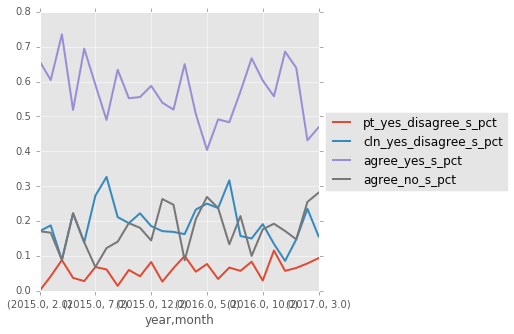

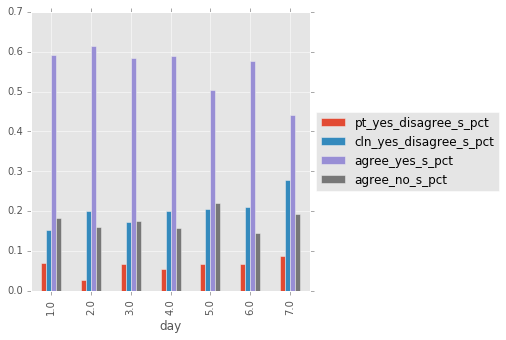

In [73]:
si_plot_time=mk_plot_df(db,'si_pst_wk_nona','cln_si')
si_plot_time_day=mk_plot_df(db,'si_pst_wk_nona','cln_si',yrmnth=False)

si_plot_time[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(figsize=[5,5],linewidth=2)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
si_plot_time_day[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(kind='bar',figsize=[5,5])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [76]:
sa_plot_time=mk_plot_df(db,'sa_pst_wk_nona','cln_sa')
sa_plot_time_day=mk_plot_df(db,'sa_pst_wk_nona','cln_sa',yrmnth=False)

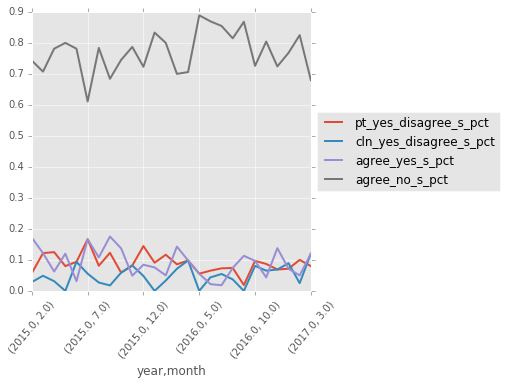

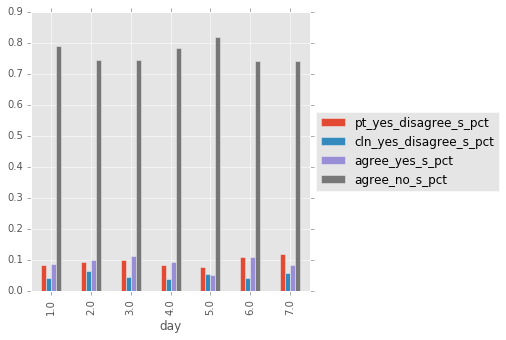

In [78]:
sa_plot_time[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(figsize=[5,5],linewidth=2,rot=50)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
sa_plot_time_day[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(kind='bar',figsize=[5,5])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

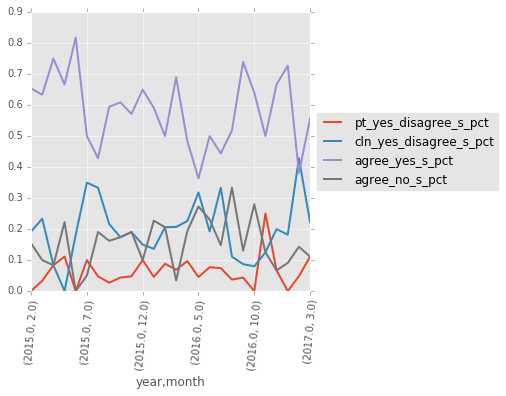

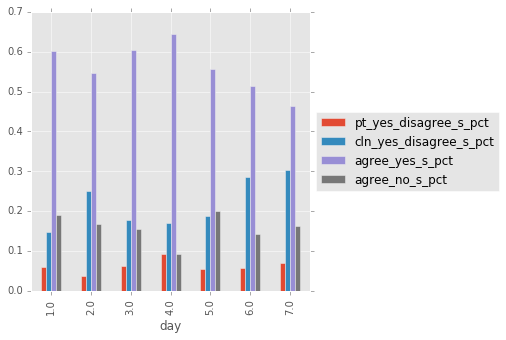

In [82]:
si_plot_time=mk_plot_df(db[db.cln_type==1],'si_pst_wk_nona','cln_si')
si_plot_time_day=mk_plot_df(db[db.cln_type==1],'si_pst_wk_nona','cln_si',yrmnth=False)

si_plot_time[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(figsize=[5,5],linewidth=2,rot=85)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
si_plot_time_day[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(kind='bar',figsize=[5,5])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

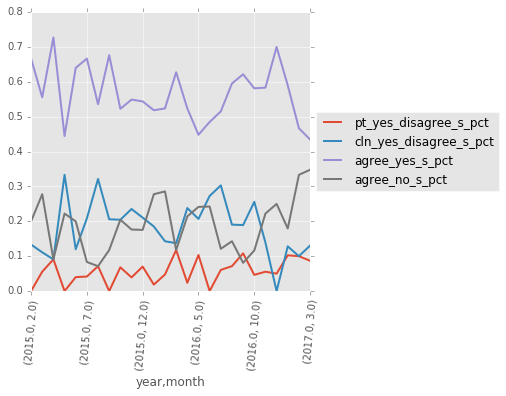

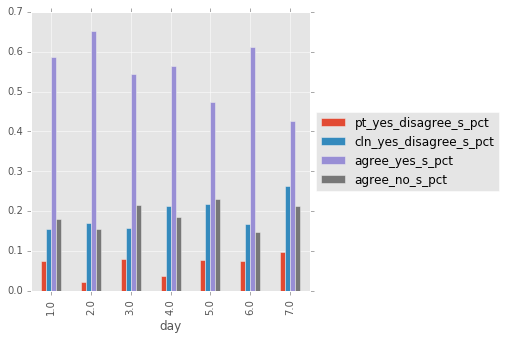

In [84]:
si_plot_time=mk_plot_df(db[db.cln_type>1],'si_pst_wk_nona','cln_si')
si_plot_time_day=mk_plot_df(db[db.cln_type>1],'si_pst_wk_nona','cln_si',yrmnth=False)

si_plot_time[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(figsize=[5,5],linewidth=2,rot=85)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
si_plot_time_day[['pt_yes_disagree_s_pct','cln_yes_disagree_s_pct','agree_yes_s_pct','agree_no_s_pct']].plot(kind='bar',figsize=[5,5])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

(0, 0.3)

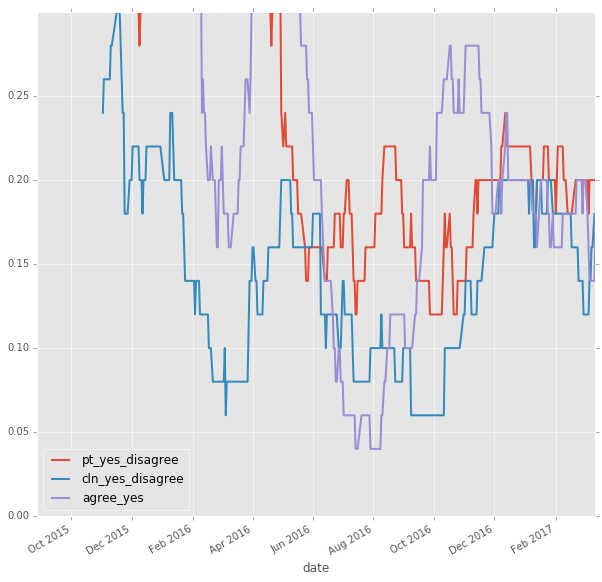

In [226]:
sa_plot_time[sa_plot_time.columns[0:3]].rolling(window=50).mean().plot(figsize=[10,10],linewidth=2)
plt.ylim([0,.3])

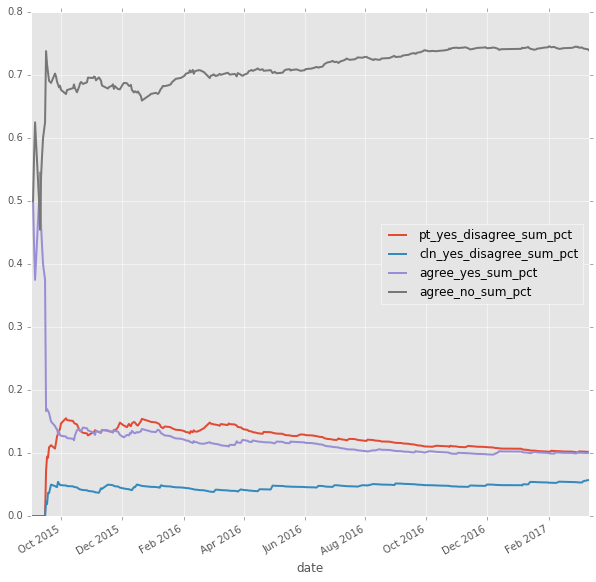

In [231]:
sa_plot_time=mk_plot_df(db[db.cln_type==1],'sa_pst_wk_nona','cln_sa')
sa_plot_time[sa_plot_time.filter(like='m_pct').columns].plot(figsize=[10,10],linewidth=2)
#plt.ylim([0,.3])

(0, 0.3)

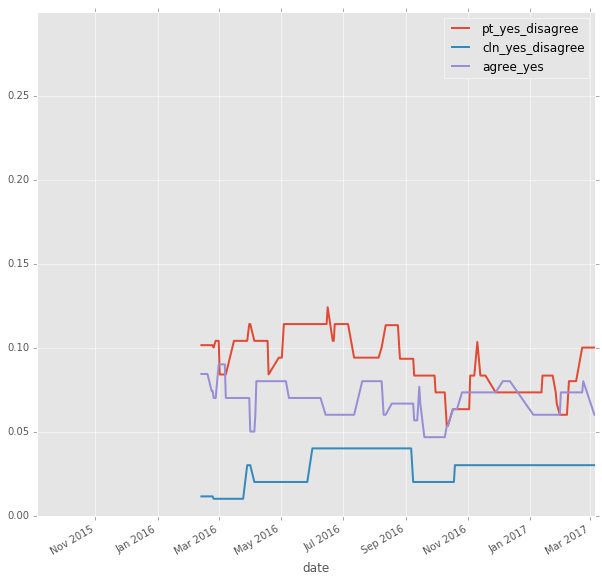

In [43]:
sa_plot_time=mk_plot_df(db[db.cln_type>2],'sa_pst_wk_nona','cln_sa')
sa_plot_time[sa_plot_time.columns[0:3]].rolling(window=50).mean().plot(figsize=[10,10],linewidth=2)
plt.ylim([0,.3])

In [346]:
db.cln_type.unique()

array([  1.,   2.,   5.,   4.,   3.,  nan])

In [171]:
si_pt_yes_disagree=db[(db['si_pst_wk_nona']==1)&(db['cln_si']==2)&(db['si_pst_wk_nona'].notnull())&(db['cln_si'].notnull())]\
[['subn','si_pst_wk_nona','cln_si','date']]
si_cln_yes_disagree=db[(db['si_pst_wk_nona']==2)&(db['cln_si']==1)&(db['si_pst_wk_nona'].notnull())&(db['cln_si'].notnull())]\
[['subn','si_pst_wk_nona','cln_si','date']]
si_agree_yes=db[(db['si_pst_wk_nona']==1)&(db['cln_si']==1)&(db['si_pst_wk_nona'].notnull())&(db['cln_si'].notnull())]\
[['subn','si_pst_wk_nona','cln_si','date']]
si_agree_no=db[(db['si_pst_wk_nona']==2)&(db['cln_si']==2)&(db['si_pst_wk_nona'].notnull())&(db['cln_si'].notnull())]\
[['subn','si_pst_wk_nona','cln_si','date']]

In [209]:
si_pt_yes_disagree_date=mk_dt_idx(si_pt_yes_disagree,'si_pt_yes_disagree',1)
si_cln_yes_disagree_date=mk_dt_idx(si_cln_yes_disagree,'si_cln_yes_disagree',2)
si_agree_yes_date=mk_dt_idx(si_agree_yes,'si_agree_yes',3)
si_agree_no_date=mk_dt_idx(si_agree_no,'si_agree_no',4)

In [ ]:
t=pd.concat([si_pt_yes_disagree_date.si_pt_yes_disagree,\
           si_cln_yes_disagree_date.si_cln_yes_disagree,\
           si_agree_yes_date.si_agree_yes,\
           si_agree_no_date.si_agree_no])
t=t.sort_index()
t=t.to_frame()
t.loc[t[0]==1,'si_pt_yes_disagree']=1
t.loc[t[0]==2,'si_cln_yes_disagree']=1
t.loc[t[0]==3,'si_agree_yes']=1
t.loc[t[0]==4,'si_agree_no']=1
t=t.drop([0],axis=1)

In [287]:
t2=pd.DataFrame(columns=t.columns,index=t.index.unique())
for idx in t.index:
    if type(t.loc[idx])==pd.core.series.Series:
        t2.loc[idx]=t.loc[idx].values
    else:
        t2.loc[idx]=t.loc[idx].sum().to_frame().T.values

In [290]:
t2['summed']=t2.sum(axis=1)
t2=t2.fillna(0)
t2.si_pt_yes_disagree=t2.si_pt_yes_disagree/t2.summed
t2.si_cln_yes_disagree=t2.si_cln_yes_disagree/t2.summed
t2.si_agree_yes=t2.si_agree_yes/t2.summed
t2.si_agree_no=t2.si_agree_no/t2.summed
t2=t2.drop(['summed'],axis=1)

In [299]:
t2.plot(l)

(0, 1)

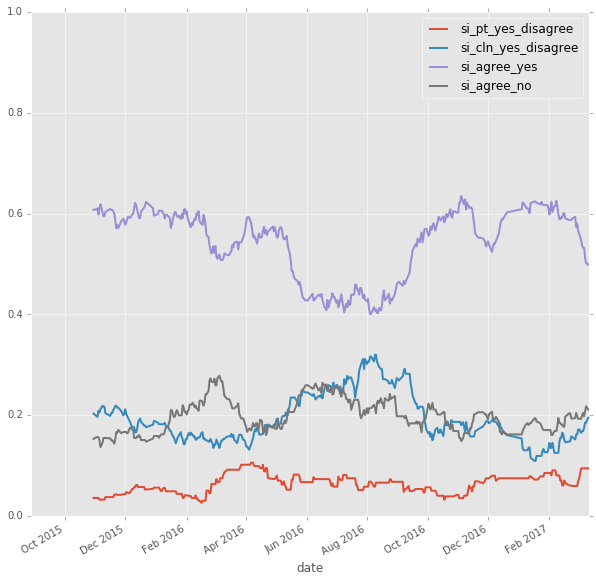

In [326]:
t2[t2.columns[0:4]].rolling(window=50).mean().plot(figsize=[10,10],linewidth=2)
plt.ylim([0,1])

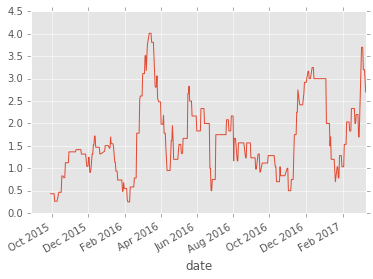

In [304]:
t2.si_pt_yes_disagree.rolling(window=25).sum().plot()

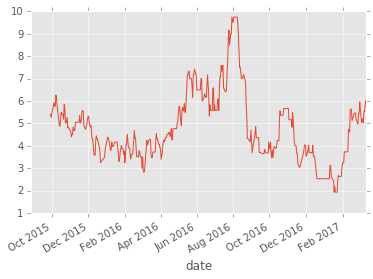

In [307]:
t2.si_cln_yes_disagree.rolling(window=25).sum().plot()

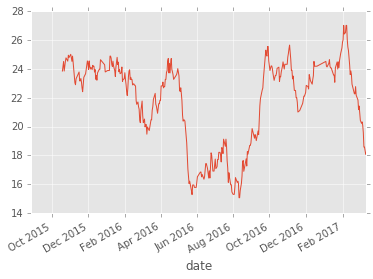

In [313]:
t2.si_agree_yes.rolling(window=40).sum().plot()

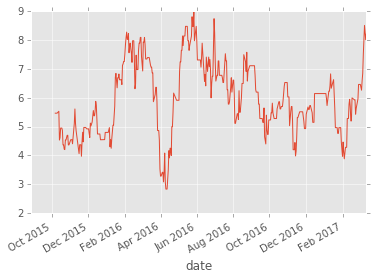

In [315]:
t2.si_agree_no.rolling(window=30).sum().plot()

### Invalid responses

In [232]:
bl_slfhrm_sa_mostrec_vchk_bad_subs=pd.read_csv(datapth+'bl_slfhrm_sa_mostrec_vchk_bad_subs.csv')
bl_slfhrm_sa_vchk_bad_subs=pd.read_csv(datapth+'bl_slfhrm_sa_vchk_bad_subs.csv')

In [237]:
bl_slfhrm_sa_mostrec_vchk_bad_subs.bl_demo_age.mean()

39.392156862745097

In [238]:
db.bl_demo_age.mean()

35.842484747642814

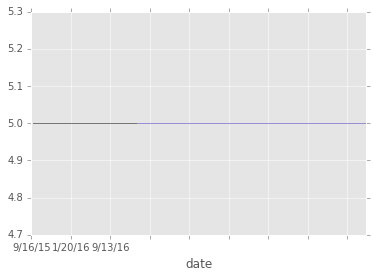

In [146]:
si_pt_yes_disagree_date.o.rolling(window=5).sum().plot()
si_cln_yes_disagree_date.o.rolling(window=5).sum().plot()
si_agree_yes_date.o.rolling(window=5).sum().plot()
si_agree_no_date.o.rolling(window=5).sum().plot()


In [245]:
si_pt_yes_disagree_date=si_agree_no.copy(deep=True)
si_cln_yes_disagree_date=si_agree_no.copy(deep=True)
si_agree_yes_date=si_agree_no.copy(deep=True)
si_agree_no_date=si_agree_no.copy(deep=True)

In [246]:
si_pt_yes_disagree_date.index=si_agree_no_date.bl_datetime_date
si_cln_yes_disagree_date.index=si_agree_no_date.bl_datetime_date
si_agree_yes_date.index=si_agree_no_date.bl_datetime_date
si_agree_no_date.index=si_agree_no_date.bl_datetime_date

In [247]:
si_pt_yes_disagree_date=si_pt_yes_disagree_date.drop(['bl_datetime_date'],axis=1)
si_cln_yes_disagree_date=si_cln_yes_disagree_date.drop(['bl_datetime_date'],axis=1)
si_agree_yes_date=si_agree_yes_date.drop(['bl_datetime_date'],axis=1)
si_agree_no_date=si_agree_no_date.drop(['bl_datetime_date'],axis=1)

In [248]:
si_agree_no_date

,si_pst_wk_nona,cln_si
bl_datetime_date,,
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0
NaN,2.0,2.0


In [ ]:
##Different time patient got validity questions wrong

In [ ]:
pt_sa_yes_cln_si_no=db[(db['sa_pst_wk_nona']==1)&(db['cln_si']==2)&(db['sa_pst_wk_nona'].notnull())&(db['cln_si'].notnull())].shape[0]
pt_sa_yes_cln_si_yes=db[(db['sa_pst_wk_nona']==1)&(db['cln_si']==1)&(db['sa_pst_wk_nona'].notnull())&(db['cln_si'].notnull())].shape[0]
cln_sa_yes_pt_si_no=db[(db['si_pst_wk_nona']==2)&(db['cln_sa']==1)&(db['si_pst_wk_nona'].notnull())&(db['cln_sa'].notnull())].shape[0]
cln_sa_yes_pt_si_yes=db[(db['si_pst_wk_nona']==1)&(db['cln_sa']==1)&(db['si_pst_wk_nona'].notnull())&(db['cln_sa'].notnull())].shape[0]


In [94]:
len(t[0].unique())

655

In [ ]:
'si_pst_wk_nona','cln_si','f1_f6_slfhrm_si_narrow'

In [61]:
roc_auc_score(db[(db.f1_f6_slfhrm_si_narrow.notnull())&(db.si_pst_wk_nona.notnull())].f1_f6_slfhrm_si_narrow,\
              db[(db.f1_f6_slfhrm_si_narrow.notnull())&(db.si_pst_wk_nona.notnull())].si_pst_wk_nona)

0.66025022811009348

In [62]:
roc_auc_score(db[(db.f1_f6_slfhrm_si_narrow.notnull())&(db.cln_si.notnull())].f1_f6_slfhrm_si_narrow,\
              db[(db.f1_f6_slfhrm_si_narrow.notnull())&(db.cln_si.notnull())].cln_si)

0.38451228802799015

In [ ]:
bdsc_senspec=senspec(bdsc,'grpAT_NonAT',bdscs_cols,'1_AT','2_NoAT')

In [7]:
### NUmber of people that got validation questions wrong for suicidal thoughts and actions. 

In [8]:
def addgrp_sa_recency(d):
    d['grp_sa_recency']=np.nan
    #Recent = Past month
    d.loc[((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull())),'grp_sa_recency'] = '3_no_sa'
    d.loc[(d.bl_slfhrm_sa==1)&(d.bl_slfhrm_sa_mostrec>2),'grp_sa_recency'] = '2_sa_lt'
    d.loc[(d.bl_slfhrm_sa==1)&(d.bl_slfhrm_sa_mostrec<3),'grp_sa_recency'] = '1_sa_pst_mnth'
    return(d)

In [9]:
def addgrp_recent_sev1wk(d):
    d['grp_recent_sev1wk']=np.nan
    #Recent = Past month
    d.loc[((d.bl_slfhrm_pasv_si==2)|(d.bl_slfhrm_pasv_si.isnull()))&\
       ((d.bl_slfhrm_si==2)|(d.bl_slfhrm_si.isnull()))&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull()))\
                                                                            ,'grp_recent_sev1wk']= '4_no_si_no_sa'
    d.loc[((d.bl_slfhrm_si==1)|(d.bl_slfhrm_sa==1))&((d.bl_slfhrm_si_mostrec>=2)&((d.bl_slfhrm_sa_mostrec>=2))),'grp_recent_sev1wk'] = '3_sa_si_>_pst_week'
    d.loc[(d.bl_slfhrm_si==1)&(d.bl_slfhrm_si_mostrec<2),'grp_recent_sev1wk'] = '2_si_pst_week'
    d.loc[(d.bl_slfhrm_sa==1)&(d.bl_slfhrm_sa_mostrec<2),'grp_recent_sev1wk'] = '1_sa_pst_week'
    return(d)

In [10]:
def addgrp_recent_sev1mo(d):
    d['grp_recent_sev1mo']=np.nan
    #Recent = Past month
    d.loc[((d.bl_slfhrm_pasv_si==2)|(d.bl_slfhrm_pasv_si.isnull()))&\
       ((d.bl_slfhrm_si==2)|(d.bl_slfhrm_si.isnull()))&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull()))\
                                                                            ,'grp_recent_sev1mo']= '3_no_si_no_sa'
    
    d.loc[(d.bl_slfhrm_si==1)&(d.bl_slfhrm_si_mostrec<3),'grp_recent_sev1mo'] = '2_sa_pst_month'
    d.loc[(d.bl_slfhrm_sa==1)&(d.bl_slfhrm_sa_mostrec<3),'grp_recent_sev1mo'] = '1_sa_pst_month'
    return(d)

In [11]:
def addgrp_slfhrm_sev(d):
    d['grp_slfhrm_sev']=np.nan

    #Lifetime
    d.loc[((d.bl_slfhrm_pasv_si==2)|(d.bl_slfhrm_pasv_si.isnull()))&\
       ((d.bl_slfhrm_si==2)|(d.bl_slfhrm_si.isnull()))&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull()))\
                                                                            ,'grp_slfhrm_sev']= '4_no_si_no_sa'
    d.loc[(d.bl_slfhrm_pasv_si==1)&(d.bl_slfhrm_si==2)&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull())),'grp_slfhrm_sev'] = '3_pass_si__no_si_no_sa'
    d.loc[(d.bl_slfhrm_si==1)&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull())),'grp_slfhrm_sev'] = '2_si__no_sa'
    d.loc[(d.bl_slfhrm_si==1)&(d.bl_slfhrm_sa==1),'grp_slfhrm_sev'] = '1_sa'
    return(d)

In [12]:
def addgrp_sui_sev(d):
    d['grp_sui_sev']=np.nan

    #Lifetime
    d.loc[((d.bl_slfhrm_pasv_si==2)|(d.bl_slfhrm_pasv_si.isnull()))&\
       ((d.bl_slfhrm_si==2)|(d.bl_slfhrm_si.isnull()))&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull()))\
                                                                            ,'grp_sui_sev']= '3_no_si_no_sa'
    d.loc[(d.bl_slfhrm_pasv_si==1)&(d.bl_slfhrm_si==2)&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull())),'grp_sui_sev'] = np.nan 
    d.loc[(d.bl_slfhrm_si==1)&((d.bl_slfhrm_sa==2)|(d.bl_slfhrm_sa.isnull())),'grp_sui_sev'] = '2_si__no_sa'
    d.loc[(d.bl_slfhrm_si==1)&(d.bl_slfhrm_sa==1),'grp_sui_sev'] = '1_sa'
    return(d)

In [13]:
def addgrp_cln_sui_sev(d):
    d['grp_cln_sui_sev']=np.nan

    #Lifetime
    d.loc[((d.cln_si==2)|(d.cln_si.isnull()))&((d.cln_sa==2)|(d.cln_sa.isnull()))\
                                                                            ,'grp_cln_sui_sev']= '3_cln_no_si_no_sa'
    d.loc[(d.cln_si==1)&((d.cln_sa==2)|(d.cln_sa.isnull())),'grp_cln_sui_sev'] = '2_cln_si__no_sa'
    d.loc[(d.cln_si==1)&(d.cln_sa==1),'grp_cln_sui_sev'] = '1_cln_sa'
    return(d)

In [14]:
db=addgrp_sa_recency(db)
db=addgrp_slfhrm_sev(db)
db=addgrp_cln_sui_sev(db)
db=addgrp_sui_sev(db)
db=addgrp_recent_sev1wk(db)
db=addgrp_recent_sev1mo(db)

In [15]:
db.filter(like='cln').columns

Index(['cln_datetime_enddate', 'cln_type', 'cln_type_text', 'cln_si', 'cln_sa',
       'cln_likelihood_sa1mo', 'cln_likelihood_sa6mo', 'cln_confdnce_predicts',
       'grp_cln_sui_sev'],
      dtype='object')

In [75]:
sa_gpby_narrow=db.groupby(['bl_slfhrm_sa','bl_slfhrm_sa_mostrec','cln_sa','f1_f6_slfhrm_sa_narrow']).f1_f6_slfhrm_sa_narrow.count()
sa_gpby_narrow_w_na=db.fillna(-999).groupby(['bl_slfhrm_sa','bl_slfhrm_sa_mostrec','cln_sa','f1_f6_slfhrm_sa_narrow']).f1_f6_slfhrm_sa_narrow.count()

sa_gpby_broad=db.groupby(['bl_slfhrm_sa','bl_slfhrm_sa_mostrec','cln_sa','f1_f6_slfhrm_sa_broad']).f1_f6_slfhrm_sa_broad.count()
sa_gpby_broad_w_na=db.fillna(-999).groupby(['bl_slfhrm_sa','bl_slfhrm_sa_mostrec','cln_sa','f1_f6_slfhrm_sa_broad']).f1_f6_slfhrm_sa_broad.count()

In [77]:
sa_missing_narrow=num_missing(sa_gpby_narrow_w_na)
sa_missing_narrow

,Num Missing
bl_slfhrm_sa,471
bl_slfhrm_sa_mostrec,112
cln_sa,26
f1_f6_slfhrm_sa_narrow,390


In [21]:
db.groupby(['bl_slfhrm_si','bl_slfhrm_si_mostrec','cln_si']).bl_slfhrm_si.count()

bl_slfhrm_si  bl_slfhrm_si_mostrec  cln_si
1.0           1.0                   1.0       850
                                    2.0        89
              2.0                   1.0        58
                                    2.0        16
              3.0                   1.0        40
                                    2.0        17
              4.0                   1.0        23
                                    2.0        15
              5.0                   1.0        29
                                    2.0        20
Name: bl_slfhrm_si, dtype: int64

In [20]:
db.fillna(-99).groupby(['bl_slfhrm_si','bl_slfhrm_si_mostrec','cln_si']).bl_slfhrm_si.count()

bl_slfhrm_si  bl_slfhrm_si_mostrec  cln_si
-99.0         -99.0                 -99.0       5
                                     1.0      169
                                     2.0       39
 1.0          -99.0                 -99.0       4
                                     1.0       51
                                     2.0       63
               1.0                  -99.0      12
                                     1.0      850
                                     2.0       89
               2.0                  -99.0       1
                                     1.0       58
                                     2.0       16
               3.0                  -99.0       1
                                     1.0       40
                                     2.0       17
               4.0                   1.0       23
                                     2.0       15
               5.0                   1.0       29
                                     2.0       20
 2.0   

### Create groups that mix clinician and self-report

### Ideation

In [ ]:
db.groupby(['bl_slfhrm_si','bl_slfhrm_si_mostrec',])

In [17]:
db['grp_cln_slf_sui_sev'] = db['grp_cln_sui_sev'] + '_'+ db['grp_sui_sev']
db['grp_cln_slf_sui_rec_sev1wk'] = db['grp_cln_sui_sev'] + '_'+ db['grp_recent_sev1wk']
db['grp_cln_slf_sui_rec_sev1mo'] = db['grp_cln_sui_sev'] + '_'+ db['grp_recent_sev1mo']

#### Examine clinician - self-report correspondence

In [18]:
db[db.bl_slfhrm_sa_mostrec==1].groupby('grp_cln_sui_sev').grp_cln_sui_sev.count()

grp_cln_sui_sev
1_cln_sa             112
2_cln_si__no_sa      100
3_cln_no_si_no_sa     14
Name: grp_cln_sui_sev, dtype: int64

In [19]:
db[db.bl_slfhrm_sa_mostrec==1].groupby('grp_cln_sui_sev').grp_cln_sui_sev.count()/db[db.bl_slfhrm_sa_mostrec==1].groupby('grp_cln_sui_sev').grp_cln_sui_sev.count().sum()

grp_cln_sui_sev
1_cln_sa             0.495575
2_cln_si__no_sa      0.442478
3_cln_no_si_no_sa    0.061947
Name: grp_cln_sui_sev, dtype: float64

In [20]:
db[db.cln_sa==1].groupby('bl_slfhrm_sa').bl_slfhrm_sa.count()

bl_slfhrm_sa
1.0    148
2.0     33
Name: bl_slfhrm_sa, dtype: int64

In [21]:
db[db.cln_sa==1].groupby('bl_slfhrm_sa_mostrec').bl_slfhrm_sa_mostrec.count()

bl_slfhrm_sa_mostrec
1.0    112
2.0      6
3.0      6
4.0      3
5.0      6
6.0      8
Name: bl_slfhrm_sa_mostrec, dtype: int64

In [22]:
149/(149+33)

0.8186813186813187

In [23]:
119/(149+33)

0.6538461538461539

In [24]:
#db.f1_trmt_ovrnght_hosp_sa_nt

### Remove people with bad IATs

In [25]:
db=db[db.bl_btsk_iat_flag==0]

### Establish Narrow and Broad definition for follow-up attempts

In [26]:
db['f1_slfhrm_sa_narrow']=0
db['f6_slfhrm_sa_narrow']=0
db.loc[(db.f1_trmt_er_rsn_sa==1)|(db.f1_trmt_ovrnght_hosp_rsn_sa==1)|(db.f1_slfhrm_sa==1)\
       |(db.f1_trmt_er_sa_nt>0)|(db.f1_trmt_ovrnght_hosp_sa_nt>0)\
       ,'f1_slfhrm_sa_narrow']=1.0

db.loc[(db.f6_trmt_er_rsn_sa==1)|(db.f6_trmt_ovrnght_hosp_rsn_sa==1)|(db.f6_slfhrm_sa==1)\
       |(db.f6_trmt_er_sa_nt>0)|(db.f1_trmt_ovrnght_hosp_sa_nt>0)\
       ,'f6_slfhrm_sa_narrow']=1.0

In [27]:
db['f1_slfhrm_sa_broad']=0
db['f6_slfhrm_sa_broad']=0

db.loc[(db.f1_trmt_er_rsn_sa==1)|(db.f1_trmt_ovrnght_hosp_rsn_sa==1)|(db.f1_slfhrm_sa==1)\
       |(db.f1_trmt_er_sa_nt>0)|(db.f1_trmt_ovrnght_hosp_sa_nt>0)\
       |(db.f1_trmt_er_rsn_si==1)|(db.f1_trmt_er_si_nt>0)|(db.f1_trmt_ovrnght_hosp_rsn_si==1)\
       |(db.f1_trmt_ovrnght_hosp_si_nt>0) | (db.f1_slfhrm_interrupt==1) | (db.f1_slfhrm_abort==1)
       ,'f1_slfhrm_sa_broad']=1.0

db.loc[(db.f6_trmt_er_rsn_sa==1)|(db.f6_trmt_ovrnght_hosp_rsn_sa==1)|(db.f6_slfhrm_sa==1)\
       |(db.f6_trmt_er_sa_nt>0)|(db.f6_trmt_ovrnght_hosp_sa_nt>0)\
       |(db.f6_trmt_er_rsn_si==1)|(db.f6_trmt_er_si_nt>0)|(db.f6_trmt_ovrnght_hosp_rsn_si==1)\
       |(db.f6_trmt_ovrnght_hosp_si_nt>0) | (db.f6_slfhrm_interrupt==1) | (db.f6_slfhrm_abort==1)
       ,'f6_slfhrm_sa_broad']=1.0

In [28]:
db['f1_f6_slfhrm_sa_narrow']=0
db['f1_f6_slfhrm_sa_broad']=0

db.loc[(db['f1_slfhrm_sa_narrow']==1)|(db['f6_slfhrm_sa_narrow']==1),'f1_f6_slfhrm_sa_narrow']=1

db.loc[(db['f1_slfhrm_sa_broad']==1)|(db['f6_slfhrm_sa_broad']==1),'f1_f6_slfhrm_sa_broad']=1

### Baseline IAT - AT vs ID vs nonSuicidal (passive ideators n=63 are removed)

In [29]:
#db[(db.bl_btsk_iat_flag==0)&(db.iat_excl==0)].groupby(['grp_slfhrm_sev']).grp_slfhrm_sev.count()
db.groupby(['grp_sui_sev']).grp_slfhrm_sev.count()

grp_sui_sev
1_sa             590
2_si__no_sa      491
3_no_si_no_sa    371
Name: grp_slfhrm_sev, dtype: int64

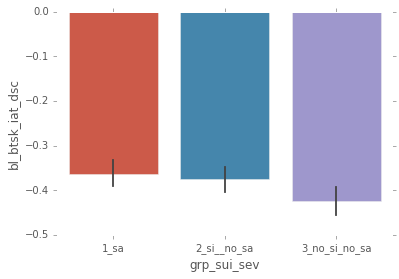

In [30]:
sns.barplot(x='grp_sui_sev', y='bl_btsk_iat_dsc', data=db.sort_values(by='grp_sui_sev'))

In [31]:
stats.f_oneway(db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev=='1_sa')].bl_btsk_iat_dsc.dropna(),\
               db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev=='2_si__no_sa')].bl_btsk_iat_dsc.dropna(),\
               db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev=='3_no_si_no_sa')].bl_btsk_iat_dsc.dropna())

F_onewayResult(statistic=4.0723081322991481, pvalue=0.017233400027650787)

In [32]:
#db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev.notnull())].bl_btsk_iat_dsc,db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev.notnull())].grp_sui_sev
mod = MultiComparison(db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev.notnull())].bl_btsk_iat_dsc,db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev.notnull())].grp_sui_sev)
display(mod.allpairtest(stats.stats.ttest_ind,method='fdr_bh')[0])

group1,group2,stat,pval,pval_corr,reject
1_sa,2_si__no_sa,0.638,0.5236,0.5236,False
1_sa,3_no_si_no_sa,2.752,0.006,0.0181,True
2_si__no_sa,3_no_si_no_sa,2.2074,0.0275,0.0413,True


#### IAT diff on groups est by clinicians report

In [33]:
stats.f_oneway(db[db.grp_cln_sui_sev=='1_cln_sa'].bl_btsk_iat_dsc.dropna(),\
               db[db.grp_cln_sui_sev=='2_cln_si__no_sa'].bl_btsk_iat_dsc.dropna(),\
               db[db.grp_cln_sui_sev=='3_cln_no_si_no_sa'].bl_btsk_iat_dsc.dropna())

F_onewayResult(statistic=1.5302474036334257, pvalue=0.21681497833715876)

#### Past week attempters and ideators

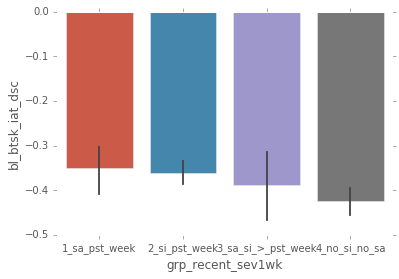

In [34]:
sns.barplot(x='grp_recent_sev1wk', y='bl_btsk_iat_dsc', data=db.sort_values(by='grp_recent_sev1wk'))

In [35]:
stats.f_oneway(db[(db.bl_btsk_iat_flag==0)&(db.grp_recent_sev1wk=='1_sa_pst_week')].bl_btsk_iat_dsc.dropna(),\
               db[(db.bl_btsk_iat_flag==0)&(db.grp_recent_sev1wk=='2_si_pst_week')].bl_btsk_iat_dsc.dropna(),\
               db[(db.bl_btsk_iat_flag==0)&(db.grp_recent_sev1wk=='3_sa_si_>_pst_week')].bl_btsk_iat_dsc.dropna(),\
               db[(db.bl_btsk_iat_flag==0)&(db.grp_recent_sev1wk=='4_no_si_no_sa')].bl_btsk_iat_dsc.dropna())

F_onewayResult(statistic=3.2559687596895874, pvalue=0.020968853711590706)

In [36]:
mod = MultiComparison(db[(db.grp_recent_sev1wk.notnull())].bl_btsk_iat_dsc,db[(db.grp_recent_sev1wk.notnull())].grp_recent_sev1wk)
display(mod.allpairtest(stats.stats.ttest_ind,method='fdr_bh')[0])

group1,group2,stat,pval,pval_corr,reject
1_sa_pst_week,2_si_pst_week,0.3722,0.7099,0.7099,False
1_sa_pst_week,3_sa_si_>_pst_week,0.7361,0.4624,0.6446,False
1_sa_pst_week,4_no_si_no_sa,2.409,0.0163,0.049,True
2_si_pst_week,3_sa_si_>_pst_week,0.6174,0.5372,0.6446,False
2_si_pst_week,4_no_si_no_sa,2.9161,0.0036,0.0217,True
3_sa_si_>_pst_week,4_no_si_no_sa,0.9011,0.368,0.6446,False


### Predicting attempts at follow-up

##### What is the baseline group - self-reported attempters, attempters and ideators, clinician report, etc...

In [37]:
#recAT=db[(db.bl_btsk_iat_flag==0)&(db.grp_recent_sev1wk=='1_sa_pst_week')].copy(deep=True)
#recAT=db[(db.bl_btsk_iat_flag==0)&(db.grp_sui_sev=='1_sa')].copy(deep=True)
#recAT=db[(db.grp_sui_sev=='1_sa')&(db.cln_sa==1)].copy(deep=True)
#recAT=db[(db.cln_sa==1)].copy(deep=True)
#recAT=db[(db.grp_sui_sev=='1_sa')|(db.cln_sa==1)].copy(deep=True)
recAT=db[(db.grp_sui_sev=='1_sa')|(db.grp_sui_sev=='2_si__no_sa')].copy(deep=True)

In [38]:
db.grp_sui_sev.unique()

array(['2_si__no_sa', '1_sa', '3_no_si_no_sa', nan], dtype=object)

In [39]:
recAT.shape

(1081, 441)

In [40]:
recAT[recAT.f1_f6_slfhrm_sa_narrow==1].shape

(150, 441)

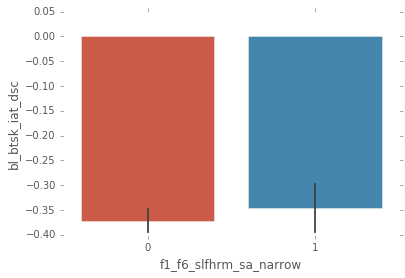

In [41]:
sns.barplot(x='f1_f6_slfhrm_sa_narrow', y='bl_btsk_iat_dsc', data=recAT.sort_values(by='f1_f6_slfhrm_sa_narrow'))

In [42]:
print('hey')

hey


In [43]:
stats.ttest_ind(recAT[recAT.f1_slfhrm_sa_narrow==1].bl_btsk_iat_dsc.dropna(),\
                recAT[recAT.f1_slfhrm_sa_narrow==0].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=0.72654116304546601, pvalue=0.46766466240667925)

In [44]:
stats.ttest_ind(recAT[recAT.f1_slfhrm_sa_broad==1].bl_btsk_iat_dsc.dropna(),\
                recAT[recAT.f1_slfhrm_sa_broad==0].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=-0.00050613376041467803, pvalue=0.99959625726053014)

In [45]:
stats.ttest_ind(recAT[recAT.f6_slfhrm_sa_narrow==1].bl_btsk_iat_dsc.dropna(),\
                recAT[recAT.f6_slfhrm_sa_narrow==0].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=1.4924437215308093, pvalue=0.13587517801719468)

In [46]:
stats.ttest_ind(recAT[recAT.f6_slfhrm_sa_broad==1].bl_btsk_iat_dsc.dropna(),\
                recAT[recAT.f6_slfhrm_sa_broad==0].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=0.42800974985133533, pvalue=0.66872943605544455)

In [47]:
stats.ttest_ind(recAT[recAT.f1_f6_slfhrm_sa_narrow==1].bl_btsk_iat_dsc.dropna(),\
                recAT[recAT.f1_f6_slfhrm_sa_narrow==0].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=0.86193701767396891, pvalue=0.38891369056465031)

In [48]:
stats.ttest_ind(recAT[recAT.f1_f6_slfhrm_sa_broad==1].bl_btsk_iat_dsc.dropna(),\
                recAT[recAT.f1_f6_slfhrm_sa_broad==0].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=0.67601174204993442, pvalue=0.49917805419283878)

In [49]:
stats.ttest_ind(recAT[(recAT.f1_f6_slfhrm_sa_broad==1)&(recAT.bl_btsk_iat_dsc>0)].bl_btsk_iat_dsc.dropna(),\
                recAT[(recAT.f1_f6_slfhrm_sa_broad==0)&(recAT.bl_btsk_iat_dsc>0)].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=-0.1079475308927923, pvalue=0.91418156943713447)

In [50]:
stats.ttest_ind(recAT[(recAT.f1_f6_slfhrm_sa_narrow==1)&(recAT.bl_btsk_iat_dsc>0)].bl_btsk_iat_dsc.dropna(),\
                recAT[(recAT.f1_f6_slfhrm_sa_narrow==0)&(recAT.bl_btsk_iat_dsc>0)].bl_btsk_iat_dsc.dropna())

Ttest_indResult(statistic=-1.002694873674137, pvalue=0.31762287997200755)

In [51]:
recAT['f1_f6_slfhrm_sa_narrow']=recAT.f1_f6_sa_narrow
recAT['f1_f6_slfhrm_sa_broad']=recAT.f1_f6_sa_broad

AttributeError: 'DataFrame' object has no attribute 'f1_f6_sa_narrow'

In [52]:
for i in ['ipad_Die','ipad_Dead','ipad_Deceased','ipad_Alive','ipad_Living','ipad_Suicide']:
    for f in ['f1','f6','f1_f6']:
        print(i)
        print(f)
        col='%s_slfhrm_sa_narrow'%f
        print(stats.ttest_ind(recAT[recAT[col]==1][i].dropna(),\
                recAT[recAT[col]==0][i].dropna()))
        print("")

ipad_Die
f1
Ttest_indResult(statistic=1.8520190258184686, pvalue=0.064296346083555292)

ipad_Die
f6
Ttest_indResult(statistic=1.7069289694077601, pvalue=0.088123234086192964)

ipad_Die
f1_f6
Ttest_indResult(statistic=0.96559845533713962, pvalue=0.33446171359687438)

ipad_Dead
f1
Ttest_indResult(statistic=1.9543407973841596, pvalue=0.05091892873793491)

ipad_Dead
f6
Ttest_indResult(statistic=1.8668131749250481, pvalue=0.062198729217374626)

ipad_Dead
f1_f6
Ttest_indResult(statistic=1.7437834797093514, pvalue=0.081481642378592456)

ipad_Deceased
f1
Ttest_indResult(statistic=-0.098830704286727786, pvalue=0.92129106329768073)

ipad_Deceased
f6
Ttest_indResult(statistic=0.58681011034803687, pvalue=0.55745411086210095)

ipad_Deceased
f1_f6
Ttest_indResult(statistic=-0.34657525096509584, pvalue=0.72897807850784513)

ipad_Alive
f1
Ttest_indResult(statistic=1.7240711338215753, pvalue=0.08498142808156034)

ipad_Alive
f6
Ttest_indResult(statistic=2.1026594220089767, pvalue=0.035726744683861576)



In [53]:
stats.f_oneway(db[db.grp_recent_sev1wk=='1_sa_pst_week'].ipad_Alive.dropna(),\
               db[db.grp_recent_sev1wk=='2_sa_pst_week'].ipad_Alive.dropna(),\
               db[db.grp_recent_sev1wk=='3_no_si_no_sa'].ipad_Alive.dropna())

/Users/alexmillner/miniconda/lib/python3.6/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


F_onewayResult(statistic=nan, pvalue=nan)

In [54]:
#END

In [55]:
def bootstrap_mean_ci(df):
    boots=[]
    for i in range(2000):
        d=df.copy(deep=True)
        b=d.sample(frac=1,replace=True).mean()
        boots.append(b)
    o=pd.Series(boots)
    low=o.quantile(.025)
    high=o.quantile(.975)
    return([low,high])

In [56]:
%%timeit
db.groupby('grp_recent_sev1wk').apply(lambda x: x.sample(frac=1,replace=True).bl_btsk_iat_dsc.mean())

14.3 ms ± 4.67 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [57]:
%%timeit
gd=db.groupby('grp_recent_sev1wk')
for d,dd in gd:
    dd.bl_btsk_iat_dsc.sample(frac=1,replace=True).mean()

8.72 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
%%timeit
db.bl_btsk_iat_dsc.sample(frac=1,replace=True).mean()

205 µs ± 24.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [59]:
bootout=[]
bootname=[]
gd=db.groupby('grp_recent_sev1wk')
for d,dd in gd:
    tmp=bootstrap_mean_ci(dd.bl_btsk_iat_dsc)
    bootout.append(tmp)
    bootname.append(d)

In [60]:
bootname

['1_sa_pst_week', '2_si_pst_week', '3_sa_si_>_pst_week', '4_no_si_no_sa']

In [61]:
bootout2=pd.DataFrame(bootout,index=bootname,columns=['low','high'])

In [62]:
bootout2

,low,high
1_sa_pst_week,-0.405550,-0.299629
2_si_pst_week,-0.388620,-0.336337
3_sa_si_>_pst_week,-0.465308,-0.308470
4_no_si_no_sa,-0.457351,-0.392213


In [63]:
db[db['grp_recent_sev1wk']=='1_sa_pst_week'].shape

(172, 441)

In [64]:
db.groupby('grp_recent_sev1wk').bl_btsk_iat_dsc.sem()*1.96

grp_recent_sev1wk
1_sa_pst_week         0.053637
2_si_pst_week         0.026028
3_sa_si_>_pst_week    0.079956
4_no_si_no_sa         0.032268
Name: bl_btsk_iat_dsc, dtype: float64

In [65]:
db.groupby('grp_recent_sev1wk').bl_btsk_iat_dsc.mean()-bootout2.iloc[:,0]

grp_recent_sev1wk
1_sa_pst_week         0.054414
2_si_pst_week         0.026587
3_sa_si_>_pst_week    0.077688
4_no_si_no_sa         0.032684
dtype: float64

In [66]:
db.groupby('grp_recent_sev1wk').bl_btsk_iat_dsc.count()

grp_recent_sev1wk
1_sa_pst_week         172
2_si_pst_week         640
3_sa_si_>_pst_week     74
4_no_si_no_sa         371
Name: bl_btsk_iat_dsc, dtype: int64

In [67]:
os.chdir('/Users/alexmillner/Google Drive/Work/CurrentProjects/MGH_AFSP')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/alexmillner/Google Drive/Work/CurrentProjects/MGH_AFSP'

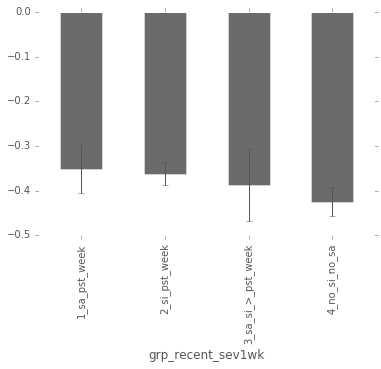

In [68]:
ci=db.groupby('grp_recent_sev1wk').bl_btsk_iat_dsc.sem()*1.96
db.groupby('grp_recent_sev1wk').bl_btsk_iat_dsc.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')
plt.savefig('baseline_recent_sev1wk.pdf')

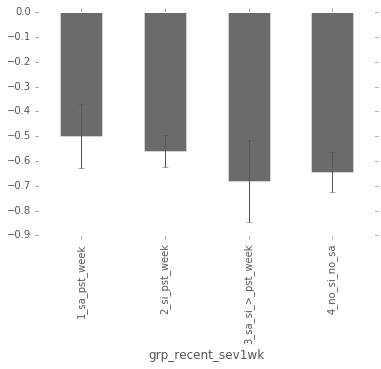

In [69]:
ci=db.groupby('grp_recent_sev1wk').ipad_Alive.sem()*1.96
db.groupby('grp_recent_sev1wk').ipad_Alive.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')

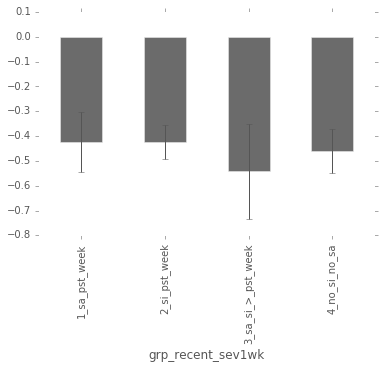

In [70]:
ci=db.groupby('grp_recent_sev1wk').ipad_Dead.sem()*1.96
db.groupby('grp_recent_sev1wk').ipad_Dead.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')

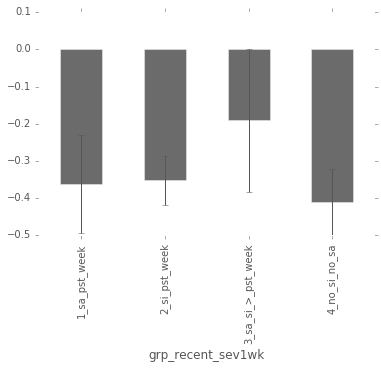

In [71]:
ci=db.groupby('grp_recent_sev1wk').ipad_Die.sem()*1.96
db.groupby('grp_recent_sev1wk').ipad_Die.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')

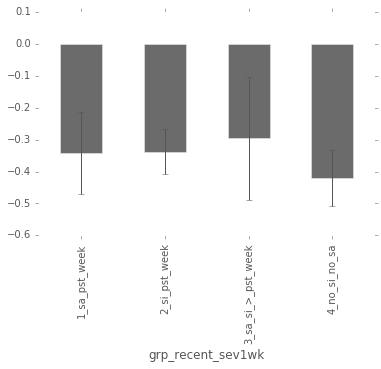

In [72]:
ci=db.groupby('grp_recent_sev1wk').ipad_Suicide.sem()*1.96
db.groupby('grp_recent_sev1wk').ipad_Suicide.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')

In [73]:
pwd

'/Volumes/nocklab/NOCKshare/Projects/Matt CURRENT PROJECTS/AFSP-MGH/09_DATA MANAGEMENT/data/analyses'

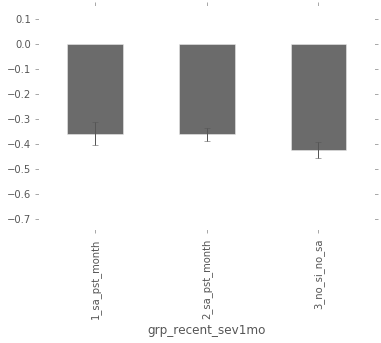

In [74]:
ci=db.groupby('grp_recent_sev1mo').bl_btsk_iat_dsc.sem()*1.96
db.groupby('grp_recent_sev1mo').bl_btsk_iat_dsc.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')
plt.ylim(-0.74,0.15)
plt.savefig('AFSP_baselinegrp_recent_sev1moV2.pdf')

In [80]:
db.groupby('grp_recent_sev1mo').bl_btsk_iat_dsc.count().sum()

1245

In [85]:
db.groupby('grp_cln_slf_sui_rec_sev1wk').bl_btsk_iat_dsc.count()

grp_cln_slf_sui_rec_sev1wk
1_cln_sa_1_sa_pst_week                   84
1_cln_sa_2_si_pst_week                   46
1_cln_sa_3_sa_si_>_pst_week               7
1_cln_sa_4_no_si_no_sa                   38
2_cln_si__no_sa_1_sa_pst_week            76
2_cln_si__no_sa_2_si_pst_week           513
2_cln_si__no_sa_3_sa_si_>_pst_week       44
2_cln_si__no_sa_4_no_si_no_sa           163
3_cln_no_si_no_sa_1_sa_pst_week          12
3_cln_no_si_no_sa_2_si_pst_week          81
3_cln_no_si_no_sa_3_sa_si_>_pst_week     23
3_cln_no_si_no_sa_4_no_si_no_sa         170
Name: bl_btsk_iat_dsc, dtype: int64

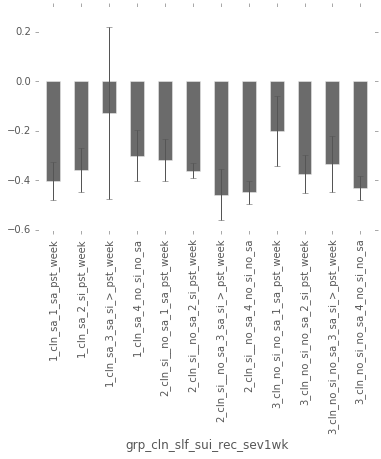

In [77]:
ci=db.groupby('grp_cln_slf_sui_rec_sev1wk').bl_btsk_iat_dsc.sem()*1.96
db.groupby('grp_cln_slf_sui_rec_sev1wk').bl_btsk_iat_dsc.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')
plt.savefig('baselinegrp_cln_slf_sui_rec_sev1wk.pdf')

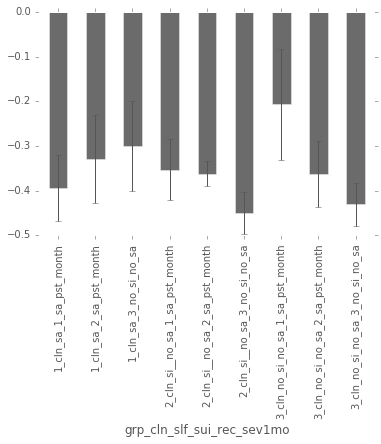

In [64]:
ci=db.groupby('grp_cln_slf_sui_rec_sev1mo').bl_btsk_iat_dsc.sem()*1.96
db.groupby('grp_cln_slf_sui_rec_sev1mo').bl_btsk_iat_dsc.mean().plot(kind='bar',yerr=ci,color='#6B6B6B')

In [215]:
os.chdir('/Users/alexmillner/Google Drive/Work/CurrentProjects/MGH_AFSP')

In [66]:
db.f6_slfhrm_sa.unique()

array(['No Attempt', nan, 'Attempt'], dtype=object)

In [67]:
db.loc[(db.f1_slfhrm_sa=='Attempt')|(db.f6_slfhrm_sa=='Attempt'),'f1_6_sa']='Attempt'
db.loc[(db.f1_slfhrm_sa=='No Attempt')|(db.f6_slfhrm_sa=='No Attempt'),'f1_6_sa']='No Attempt'

In [71]:
db.grp_slfhrm_sev.unique()

array(['1_sa', '2_si__no_sa', '4_no_si_no_sa', '3_pass_si__no_si_no_sa',
       nan], dtype=object)

In [72]:
db.grp_sui_sev.replace({'1_sa':'Attempter', '2_si__no_sa':'Ideator', '3_no_si_no_sa':'Control'},inplace=True)

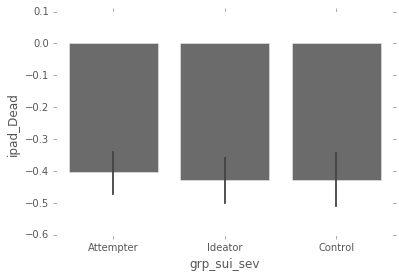

In [73]:
sns.barplot(x='grp_sui_sev', y='ipad_Dead', data=db[db.grp_slfhrm_sev!='3_pass_si__no_si_no_sa'],color='#6B6B6B')
plt.savefig('MGH_AFSP_Baseline.pdf')

In [68]:
db.bl_slfhrm_sa.unique()

array([  1.,   2.,  nan])

In [69]:
stats.ttest_ind(db[(db.bl_slfhrm_sa==1)&(db.f6_slfhrm_sa=='Attempt')].ipad_Dead.dropna(),db[(db.bl_slfhrm_sa==1)&(db.f6_slfhrm_sa=='No Attempt')].ipad_Dead.dropna())



Ttest_indResult(statistic=2.3607510301589612, pvalue=0.018705201196569744)

In [71]:
stats.ttest_ind(db[(db.bl_slfhrm_sa==1)&(db.f1_6_sa=='Attempt')].ipad_Dead.dropna(),db[(db.bl_slfhrm_sa==1)&(db.f1_6_sa=='No Attempt')].ipad_Dead.dropna())


Ttest_indResult(statistic=1.9269350845226632, pvalue=0.054549549988914002)

In [ ]:
db[(db.bl_slfhrm_sa==1)&(db.f6_slfhrm_sa=='Attempt')].ipad_Dead.dropna()

In [77]:
db.groupby('f1_6_sa').bl_btsk_iat_dsc.count()

f1_6_sa
Attempt       125
No Attempt    862
Name: bl_btsk_iat_dsc, dtype: int64

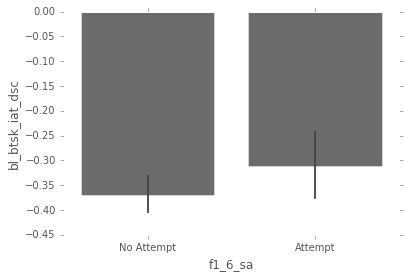

In [70]:
sns.barplot(x='f1_6_sa', y='bl_btsk_iat_dsc', data=db[db.bl_slfhrm_sa==1],color='#6B6B6B')
plt.savefig('MGH_AFSP_f1_f6.pdf')

In [125]:
cohensD(db[(db.grp_slfhrm_sev=='1_sa')&(db.f1_slfhrm_sa=='Attempt')],db[(db.grp_slfhrm_sev=='1_sa')&(db.f1_slfhrm_sa=='No Attempt')],'ipad_Die')

0.16761440507375597

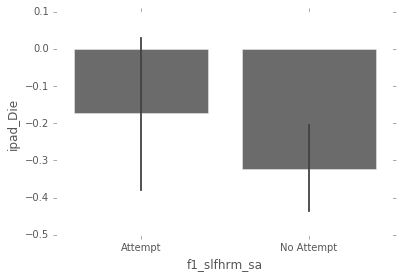

In [123]:
sns.barplot(x='f1_slfhrm_sa', y='ipad_Die', data=db[db.grp_slfhrm_sev=='1_sa'],color='#6B6B6B')
#plt.savefig('MGH_AFSP_f1_f6.pdf')

In [214]:
pwd

'/Users/alexmillner/Google Drive/Work/python'

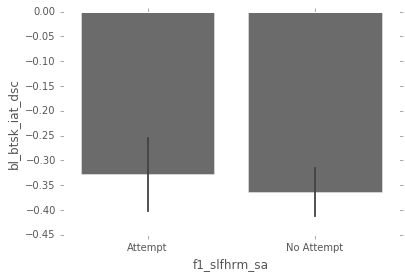

In [216]:
sns.barplot(x='f1_slfhrm_sa', y='bl_btsk_iat_dsc', data=db[db.grp_slfhrm_sev=='1_sa'],color='#6B6B6B')
plt.savefig('MGH_AFSP_f1.pdf')

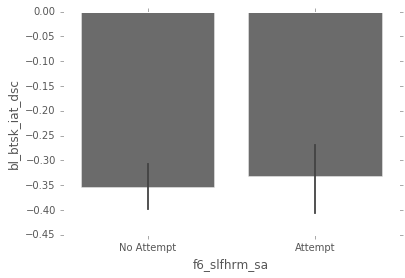

In [217]:
sns.barplot(x='f6_slfhrm_sa', y='bl_btsk_iat_dsc', data=db[db.grp_slfhrm_sev=='1_sa'],color='#6B6B6B')
plt.savefig('MGH_AFSP_f6.pdf')

In [ ]:
db.loc[(db.f6_slfhrm_sa==1)['f1_6_sa']=

In [89]:
os.chdir('/Users/alexmillner/Google Drive/Work/python/')
from pycohensD import cohensD

In [90]:
death_unw=db


In [106]:
grps=['f1_slfhrm_sa','f6_slfhrm_sa']

In [110]:
c=db.filter(like='ipad').columns[1:]

In [102]:
#c=[i[5:] for i in c]

In [127]:
c[[2,3,4,11]]

Index(['ipad_Dead', 'ipad_Deceased', 'ipad_Die', 'ipad_Suicide'], dtype='object')

In [128]:
stim_cols=c[[2,3,4,11]]

In [118]:
d=db[db.bl_slfhrm_sa==1]

In [119]:
idx=pd.IndexSlice

In [129]:
#Make Cohen's D effect size for each word
ds_lst=['death_unw']
multindx=pd.MultiIndex.from_tuples=[np.repeat(ds_lst,len(grps)),np.tile(grps,len(ds_lst))]
d_cohenD=pd.DataFrame(index=stim_cols,columns=multindx)
for d,dnm in zip([death_unw],ds_lst):
    for g in grps:
        #print(list(sorted(d.groupby(g).groups.keys()))[0])
        #print(list(sorted(d.groupby(g).groups.keys()))[1])
        for z in stim_cols:
            d_grp=d.groupby(g)
            grp1=list(sorted(d_grp.groups.keys()))[0]
            grp2=list(sorted(d_grp.groups.keys()))[1]
            d_cohenD.loc[idx[z],idx[dnm,g]]=cohensD(d_grp.get_group(grp1),d_grp.get_group(grp2),z)

In [143]:
#Bootstrapped Make Cohen's D effect size for each word
ds_lst=['death_unw']
boots=2000
multindx=[np.repeat(range(boots),len(grps)*len(ds_lst)),\
np.tile(np.repeat(ds_lst,len(grps)),boots),\
np.tile(np.tile(grps,len(ds_lst)),boots)]
multindx=pd.MultiIndex.from_tuples=multindx
d_cohenD_boot=pd.DataFrame(index=stim_cols,columns=multindx)
for b in range(boots):
    for d,dnm in zip([death_unw],ds_lst):
        for g in grps:
            for z in stim_cols:
                d_grp=d.groupby(g)
                grp1=list(sorted(d_grp.groups.keys()))[0]
                grp2=list(sorted(d_grp.groups.keys()))[1]
                d_cohenD_boot.loc[idx[z],idx[b,dnm,g]]=cohensD(d_grp.get_group(grp1).sample(frac=1,replace=True,axis=0),\
                                                        d_grp.get_group(grp2).sample(frac=1,replace=True,axis=0),\
                                                        z)
d_cohenD_boot=d_cohenD_boot.swaplevel(i=2,j=0,axis=1)
d_cohenD_boot=d_cohenD_boot.swaplevel(i=1,j=0,axis=1)

d_cohenD_boot.sort_index(inplace=True,sort_remaining=True,axis=1)


d_cohenD_boot_q975=pd.DataFrame()
d_cohenD_boot_q025=pd.DataFrame()
for g in grps:
    q975=d_cohenD_boot.loc[idx[:],idx['death_unw',g]].apply(lambda x: x.quantile(.975),axis=1)
    q025=d_cohenD_boot.loc[idx[:],idx['death_unw',g]].apply(lambda x: x.quantile(.025),axis=1)
    d_cohenD_boot_q975[g]=q975+d_cohenD_boot.loc[idx[:],idx['death_unw',g]].mean(axis=1)
    d_cohenD_boot_q025[g]=q025-d_cohenD_boot.loc[idx[:],idx['death_unw',g]].mean(axis=1)

In [202]:
for g in grps:
    q975=d_cohenD_boot.loc[idx[:],idx['death_unw',g]].apply(lambda x: x.quantile(.975),axis=1)
    q025=d_cohenD_boot.loc[idx[:],idx['death_unw',g]].apply(lambda x: x.quantile(.025),axis=1)
    d_cohenD_boot_q975[g]=q975
    d_cohenD_boot_q025[g]=q025

In [185]:
d_cohenD_boot.loc[idx[:],idx['death_unw',g]].mean(axis=1)

ipad_Dead        0.088412
ipad_Deceased    0.055456
ipad_Die         0.028523
ipad_Suicide     0.129656
dtype: float64

In [184]:
q975

ipad_Dead        0.270413
ipad_Deceased    0.232707
ipad_Die         0.209800
ipad_Suicide     0.305322
dtype: float64

In [180]:
d_cohenD_boot_q025

,f1_slfhrm_sa,f6_slfhrm_sa
ipad_Dead,-0.196180,-0.171605
ipad_Deceased,-0.190702,-0.180630
ipad_Die,-0.188530,-0.173692
ipad_Suicide,-0.188674,-0.176409


In [181]:
d_cohenD_boot_q975

,f1_slfhrm_sa,f6_slfhrm_sa
ipad_Dead,0.369472,0.358825
ipad_Deceased,0.244081,0.288163
ipad_Die,0.495752,0.238323
ipad_Suicide,0.337523,0.434978


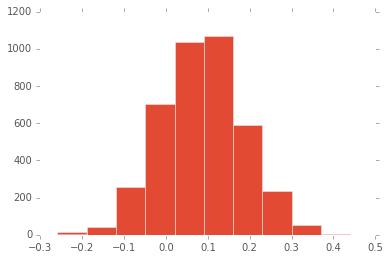

In [179]:
d_cohenD_boot.loc['ipad_Dead'].hist()

In [178]:
d_cohenD_boot

death_unw                                               \
              f1_slfhrm_sa                                                
                      0          1          2          3           4      
ipad_Dead         0.045521   0.218679   0.259768   0.236758    0.115994   
ipad_Deceased    -0.211105  0.0462909  0.0207971  0.0668027  -0.0547093   
ipad_Die          0.137222 -0.0718418   0.211475  0.0280438 -0.00254022   
ipad_Suicide     0.0270137   0.130572   0.202417  -0.136285    0.273981   

                                                                       \
                                                                        
                    5          6          7          8           9      
ipad_Dead     -0.0113332   0.183795   0.311567   0.185422    0.132362   
ipad_Deceased   0.214597   0.268378  0.0555267   -0.10745  0.00129629   
ipad_Die        0.125941   0.154955  0.0703667   0.102817    0.238663   
ipad_Suicide    0.187275  0.0485916   0.111404  0.0708775    0.150007   

                  ...                                                    \
                  ...      f6_slfhrm_sa                                   
                  ...              1990      1991       1992       1993   
ipad_Dead         ...         0.0933134  0.116491   0.134508     0.1433   
ipad_Deceased     ...         0.0323073  0.120422   0.151528  0.0127584   
ipad_Die          ...        -0.0463961 -0.081541  0.0381613   0.196338   
ipad_Suicide      ...         0.0991698  0.153942  0.0481831   0.213747   

                                                                      \
                                                                       
                   1994        1995       1996       1997       1998   
ipad_Dead      0.124921    0.196639   0.210144  0.0962723   0.192493   
ipad_Deceased  0.100885  0.00133798   0.184629   0.102468  0.0423517   
ipad_Die       0.123756   0.0516276  0.0300469   0.124051   0.165695   
ipad_Suicide   0.116477    0.294113   0.105676  0.0800061   0.127574   

                            
                            
                      1999  
ipad_Dead         0.137135  
ipad_Deceased  0.000426983  
ipad_Die        -0.0390629  
ipad_Suicide      0.168232  

[4 rows x 4000 columns]

In [182]:
dlow

,f1_slfhrm_sa,f6_slfhrm_sa
ipad_Dead,-0.196180,-0.171605
ipad_Deceased,-0.190702,-0.180630
ipad_Die,-0.188530,-0.173692
ipad_Suicide,-0.188674,-0.176409


In [183]:
dhigh

,f1_slfhrm_sa,f6_slfhrm_sa
ipad_Dead,0.369472,0.358825
ipad_Deceased,0.244081,0.288163
ipad_Die,0.495752,0.238323
ipad_Suicide,0.337523,0.434978


In [190]:
d_cohenD_boot_q025+d

,f1_slfhrm_sa,f6_slfhrm_sa
ipad_Dead,-0.112243,-0.0800324
ipad_Deceased,-0.16939,-0.124206
ipad_Die,-0.0393202,-0.14529
ipad_Suicide,-0.113487,-0.0455542


In [192]:
q975

ipad_Dead        0.270413
ipad_Deceased    0.232707
ipad_Die         0.209800
ipad_Suicide     0.305322
dtype: float64

In [191]:
d_cohenD_boot_q975-d

,f1_slfhrm_sa,f6_slfhrm_sa
ipad_Dead,0.285535,0.267253
ipad_Deceased,0.222769,0.231739
ipad_Die,0.346542,0.209922
ipad_Suicide,0.262336,0.304123


(-0.2, 0.61)

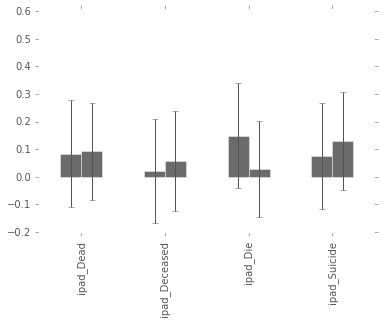

In [212]:
d=d_cohenD['death_unw']
dlow=d_cohenD_boot_q025
dhigh=d_cohenD_boot_q975
d.plot(kind='bar',yerr=abs(dlow-d),grid=False,color='#6B6B6B',legend=False)
plt.ylim(-0.2,.61)
#plt.gcf().subplots_adjust(bottom=0.4)
#plt.savefig('AFSP_mean_cohensD.pdf')

(-2, 2)

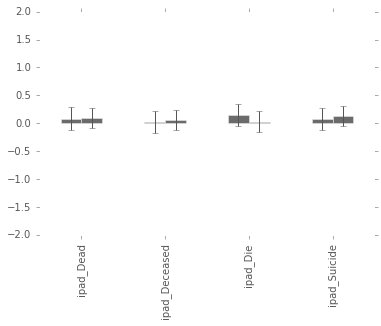

In [211]:
d=d_cohenD['death_unw']
dlow=d_cohenD_boot_q025
dhigh=d_cohenD_boot_q975
d.plot(kind='bar',yerr=abs(dhigh-d),grid=False,color='#6B6B6B',legend=False)
plt.ylim(-2,2)
#plt.gcf().subplots_adjust(bottom=0.4)
#plt.savefig('AFSP_mean_cohensD.pdf')

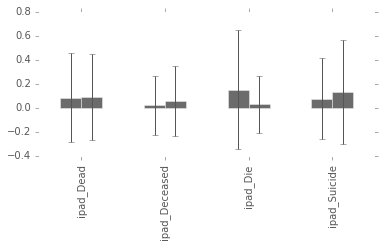

In [172]:

d=d_cohenD['death_unw']
dlow=d_cohenD_boot_q025-d
dhigh=d_cohenD_boot_q975-d
d.plot(kind='bar',yerr=dhigh,grid=False,color='#6B6B6B',legend=False)
#plt.ylim(-2,2.2)
plt.gcf().subplots_adjust(bottom=0.4)
#plt.savefig('Cassie_mean_cohensD.pdf')

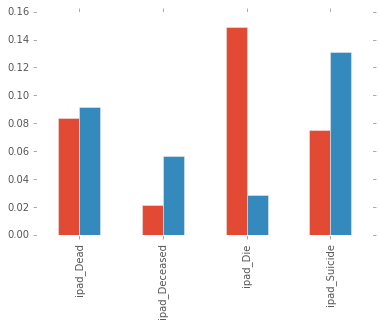

In [131]:
d_cohenD.plot(kind='bar',legend=False)

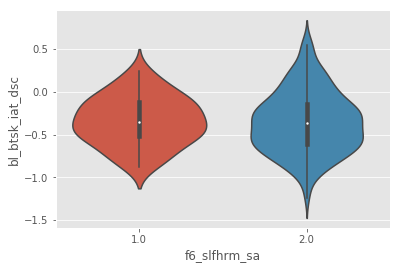

In [113]:
sns.violinplot(x='f6_slfhrm_sa', y='bl_btsk_iat_dsc', data=db[db.grp_slfhrm_sev=='1_sa'])

In [41]:
db[db.grp_slfhrm_sev=='1_sa'].groupby(['f1_slfhrm_sa']).ipad_Dead.count()

f1_slfhrm_sa
1.0     59
2.0    239
Name: ipad_Dead, dtype: int64

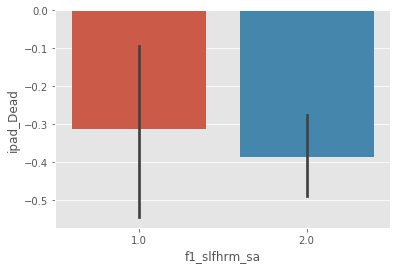

In [30]:
sns.barplot(x='f1_slfhrm_sa', y='ipad_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])

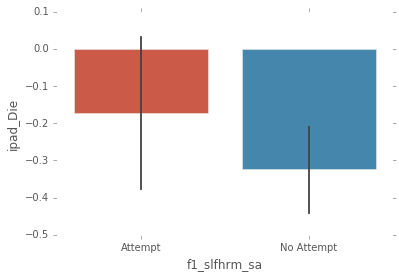

In [139]:
sns.barplot(x='f1_slfhrm_sa', y='ipad_Die', data=db[db.grp_slfhrm_sev=='1_sa'])

In [49]:
#db.filter(like='ipad')

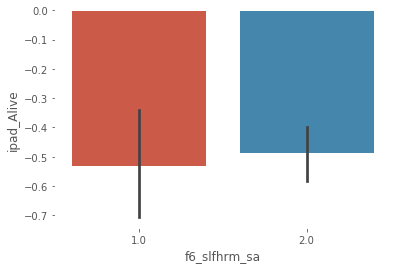

In [56]:
sns.barplot(x='f6_slfhrm_sa', y='ipad_Alive', data=db[db.grp_slfhrm_sev=='1_sa'])

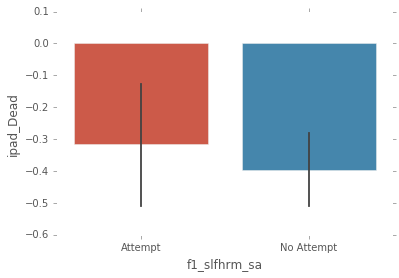

In [138]:
sns.barplot(x='f1_slfhrm_sa', y='ipad_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])

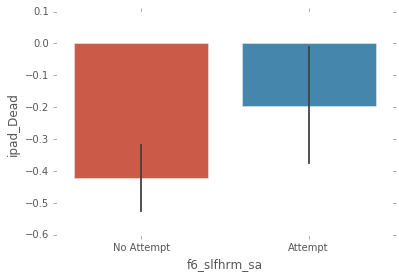

In [137]:
sns.barplot(x='f6_slfhrm_sa', y='ipad_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])

In [44]:
db[db.grp_slfhrm_sev=='1_sa'].groupby(['f1_slfhrm_sa']).ipad_Dead.count()

f1_slfhrm_sa
1.0     59
2.0    239
Name: ipad_Dead, dtype: int64

In [60]:
db[db.grp_slfhrm_sev=='1_sa'].groupby(['f6_slfhrm_sa']).ipad_Dead.count()

f6_slfhrm_sa
1.0     73
2.0    329
Name: ipad_Dead, dtype: int64

In [43]:
db[db.grp_slfhrm_sev=='1_sa'].groupby(['f1_slfhrm_sa']).lptp_Dead.count()

f1_slfhrm_sa
1.0     6
2.0    28
Name: lptp_Dead, dtype: int64

In [42]:
db[db.grp_slfhrm_sev=='1_sa'].groupby(['f6_slfhrm_sa']).lptp_Dead.count()

f6_slfhrm_sa
1.0    12
2.0    35
Name: lptp_Dead, dtype: int64

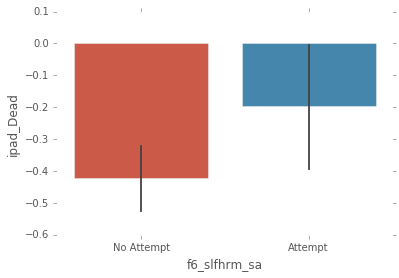

In [218]:
sns.barplot(x='f6_slfhrm_sa', y='ipad_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])

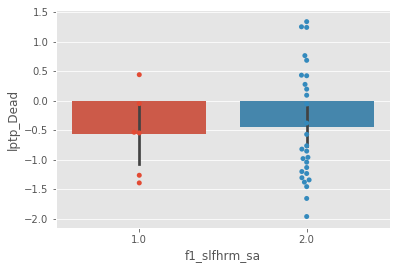

In [47]:
sns.swarmplot(x='f1_slfhrm_sa', y='lptp_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])
sns.barplot(x='f1_slfhrm_sa', y='lptp_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])

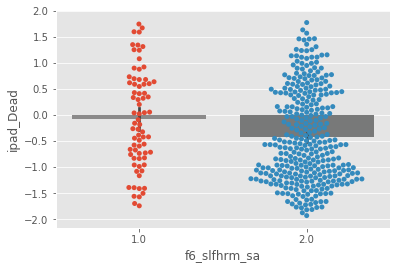

In [56]:
sns.swarmplot(x='f6_slfhrm_sa', y='ipad_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])
sns.barplot(x='f6_slfhrm_sa', y='ipad_Dead', data=db[db.grp_slfhrm_sev=='1_sa'],saturation=.01)

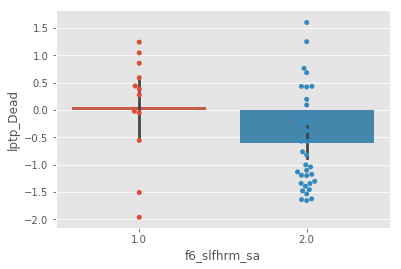

In [48]:
sns.swarmplot(x='f6_slfhrm_sa', y='lptp_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])
sns.barplot(x='f6_slfhrm_sa', y='lptp_Dead', data=db[db.grp_slfhrm_sev=='1_sa'])

In [ ]:
sns.swarmplot(x='f1_slfhrm_sa', y='ipad_Die', data=db[db.grp_slfhrm_sev=='1_sa'])
sns.barplot(x='f1_slfhrm_sa', y='ipad_Die', data=db[db.grp_slfhrm_sev=='1_sa'])

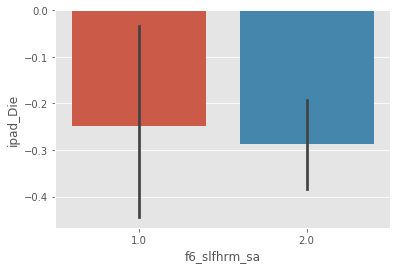

In [34]:
sns.barplot(x='f6_slfhrm_sa', y='ipad_Die', data=db[db.grp_slfhrm_sev=='1_sa'])

In [147]:
stats.ttest_ind(db_at[db_at.f1_slfhrm_sa=='Attempt'][c].dropna(),\
                db_at[db_at.f1_slfhrm_sa=='No Attempt'][c].dropna())

Ttest_indResult(statistic=array([ 2.13747804, -0.84105647,  0.89109145,  0.02023911,  1.21659868,
        1.64447664,  0.09034422, -0.81340828,  0.6962652 , -0.18310925,
       -1.07234005,  0.2449297 ,  0.575533  ,  0.48755724,  0.24517176,
       -1.1155224 ]), pvalue=array([ 0.03338391,  0.40099983,  0.37360877,  0.98386636,  0.22473272,
        0.10114658,  0.9280752 ,  0.41664226,  0.48681284,  0.85483851,
        0.28444675,  0.80668173,  0.56537111,  0.62622685,  0.80649449,
        0.26553759]))

In [149]:
db_at=db[db.grp_slfhrm_sev=='1_sa']
for col in stim_cols:
    t=stats.ttest_ind(db_at[db_at.f1_slfhrm_sa=='Attempt'][col].dropna(),\
                db_at[db_at.f1_slfhrm_sa=='No Attempt'][col].dropna())
    print(col)
    print(t)

ipad_Dead
Ttest_indResult(statistic=0.72092916245764249, pvalue=0.47150895342933008)
ipad_Deceased
Ttest_indResult(statistic=0.36871225824591936, pvalue=0.71259970194092026)
ipad_Die
Ttest_indResult(statistic=1.3374691163701387, pvalue=0.18207595634036247)
ipad_Suicide
Ttest_indResult(statistic=0.11913999265625844, pvalue=0.90524313723597438)


In [150]:
db_at=db[db.grp_slfhrm_sev=='1_sa']
for col in stim_cols:
    t=stats.ttest_ind(db_at[db_at.f6_slfhrm_sa=='Attempt'][col].dropna(),\
                db_at[db_at.f6_slfhrm_sa=='No Attempt'][col].dropna())
    print(col)
    print(t)

ipad_Dead
Ttest_indResult(statistic=2.1218176854808304, pvalue=0.034459644767906451)
ipad_Deceased
Ttest_indResult(statistic=0.33561847764775565, pvalue=0.73733280608903451)
ipad_Die
Ttest_indResult(statistic=-0.035969286009014063, pvalue=0.97132457091020441)
ipad_Suicide
Ttest_indResult(statistic=0.3669674897143605, pvalue=0.71383492690066164)


In [140]:
db_at=db[db.grp_slfhrm_sev=='1_sa']
stats.ttest_ind(db_at[db_at.f6_slfhrm_sa=='Attempt'].ipad_Dead.dropna(),\
                db_at[db_at.f6_slfhrm_sa=='No Attempt'].ipad_Dead.dropna())

Ttest_indResult(statistic=-0.035969286009014063, pvalue=0.97132457091020441)

/Users/alexmillner/miniconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


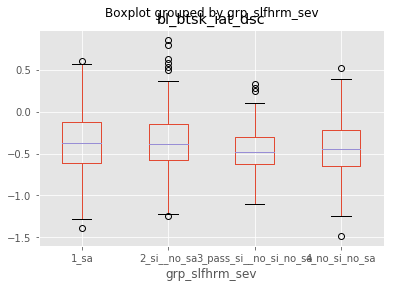

In [104]:
db.boxplot('bl_btsk_iat_dsc',by='grp_slfhrm_sev')

/Users/alexmillner/miniconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


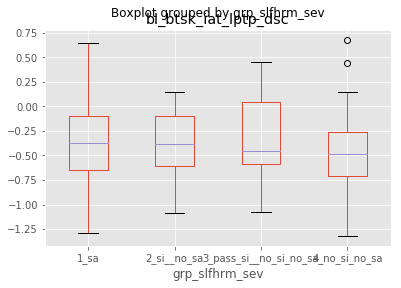

In [15]:
db.boxplot('bl_btsk_iat_lptp_dsc',by='grp_slfhrm_sev')

/Users/alexmillner/miniconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


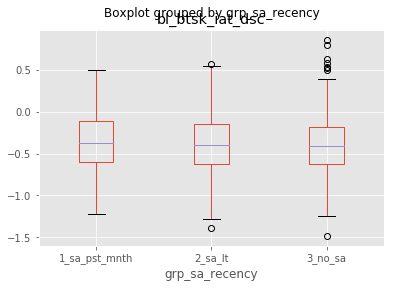

In [16]:
db.boxplot('bl_btsk_iat_dsc',by='grp_sa_recency')

In [ ]:
db.groupby(['grp_sa_recency',

In [ ]:
db.boxplot('bl_btsk_iat_dsc',by=['grp_sa_recency'])

/Users/alexmillner/miniconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


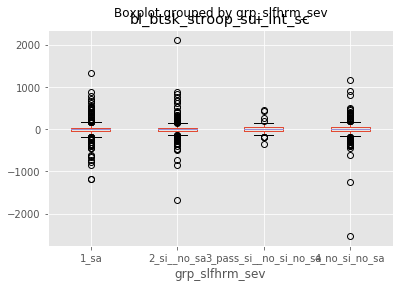

In [17]:
db.boxplot('bl_btsk_stroop_sui_int_sc',by='grp_slfhrm_sev')

In [115]:
os.chdir('/')